# **PART 1: Dataset Exploration, descriptive analysis and preprocessing**




# 1. Fetch Data (removing headers, footers and quotes)

## 1.1 Installing Libraries and Importing Dependencies

In [ ]:
!pip install scikeras
!pip install contractions
!pip install tensorflow
!pip install openai
!pip install transformers
!pip install wordcloud
!pip install optuna
!pip install nltk
!pip install gensim
!pip install seaborn`

import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import gensim.downloader as api
import nltk




nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 23.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 23.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/sim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## 1.2 Fetch 20 Newsgroup data from sklearn

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Fetch the training data
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# Fetch the testing data
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# Access the data and target labels
X_train = newsgroups_train.data
y_train = newsgroups_train.target
X_test = newsgroups_test.data
y_test = newsgroups_test.target


In [ ]:
X_train[8]

'I have win 3.0 and downloaded several icons and BMP\'s but I can\'t figure out\nhow to change the "wallpaper" or use the icons.  Any help would be appreciated.\n\n\nThanx,\n\n-Brando'

# 2. Analyze raw data

## 2.1 Inspecting a document (header, body, and footer)

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Fetch the dataset without removing headers, footers, and quotes
newsgroups_full = fetch_20newsgroups(subset='train', remove=(), shuffle=True, random_state=42)

# Inspect a document
document_index = 10  # Change this index to inspect a different document
document = newsgroups_full.data[document_index]

print(f"Document {document_index}:\n")
print(document)
print(f"\nCategory: {newsgroups_full.target_names[newsgroups_full.target[document_index]]}")


Document 10:

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-----------------------------------------------------

## 2.2 Number of documents in training and test sets

In [ ]:
print("Number of documents in the training set:", len(newsgroups_train.data))
print("Number of documents in the test set:", len(newsgroups_test.data))

Number of documents in the training set: 11314
Number of documents in the test set: 7532


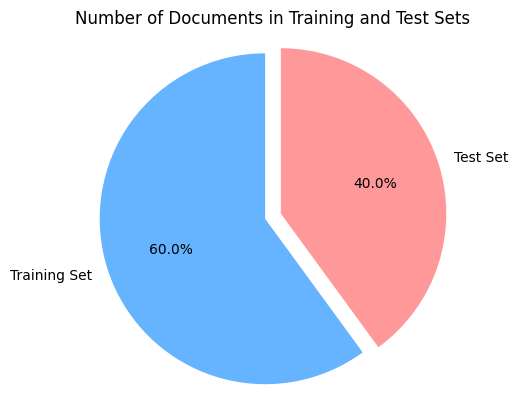

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already loaded the newsgroups_train and newsgroups_test datasets
num_train_docs = len(newsgroups_train.data)
num_test_docs = len(newsgroups_test.data)

# Data to plot
labels = ['Training Set', 'Test Set']
sizes = [num_train_docs, num_test_docs]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Explode the first slice (training set)

# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of Documents in Training and Test Sets')
plt.show()


## 2.3 Distribution of documents across categories

                    Category  Count (Train)  Count (Test)  Count (Total)
0                alt.atheism            480           319            799
1              comp.graphics            584           389            973
2    comp.os.ms-windows.misc            591           394            985
3   comp.sys.ibm.pc.hardware            590           392            982
4      comp.sys.mac.hardware            578           385            963
5             comp.windows.x            593           395            988
6               misc.forsale            585           390            975
7                  rec.autos            594           396            990
8            rec.motorcycles            598           398            996
9         rec.sport.baseball            597           397            994
10          rec.sport.hockey            600           399            999
11                 sci.crypt            595           396            991
12           sci.electronics            591        

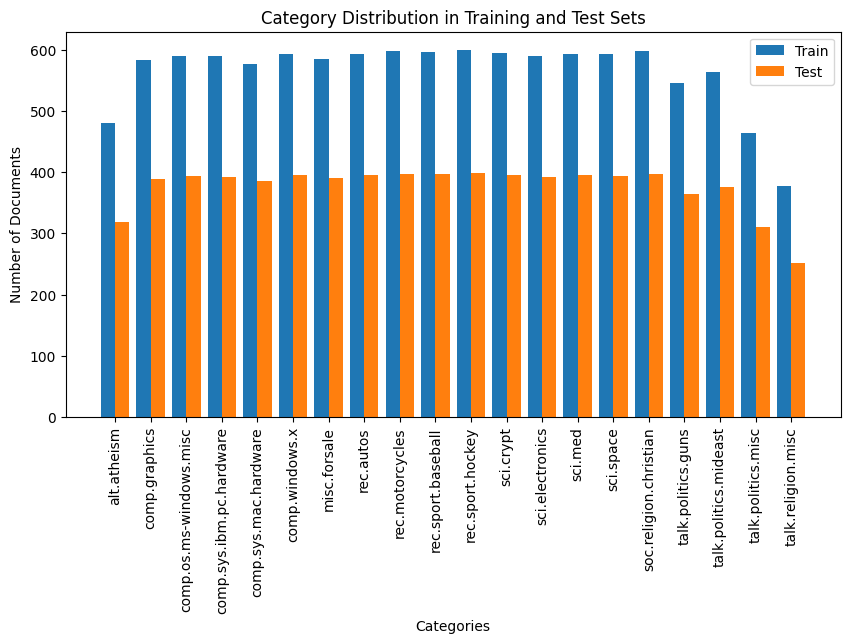

In [ ]:
import numpy as np
import pandas as pd

# Compute category counts for the train set
category_counts_train = np.unique(newsgroups_train.target, return_counts=True)

# Compute category counts for the test set
category_counts_test = np.unique(newsgroups_test.target, return_counts=True)

# Create a DataFrame with counts for both train and test sets
category_distribution = pd.DataFrame({
    'Category': newsgroups_train.target_names,
    'Count (Train)': category_counts_train[1],
    'Count (Test)': category_counts_test[1]
})

# Calculate total counts for each category
category_distribution['Count (Total)'] = category_distribution['Count (Train)'] + category_distribution['Count (Test)']

print(category_distribution)

import matplotlib.pyplot as plt

# Create a bar plot for both train and test sets
fig, ax = plt.subplots(figsize=(10, 5))
width = 0.4
x = np.arange(len(category_distribution['Category']))

ax.bar(x - width/2, category_distribution['Count (Train)'], width, label='Train')
ax.bar(x + width/2, category_distribution['Count (Test)'], width, label='Test')

plt.xticks(x, category_distribution['Category'], rotation=90)
plt.xlabel('Categories')
plt.ylabel('Number of Documents')
plt.title('Category Distribution in Training and Test Sets')
plt.legend()

plt.show()


## 2.4 Text length

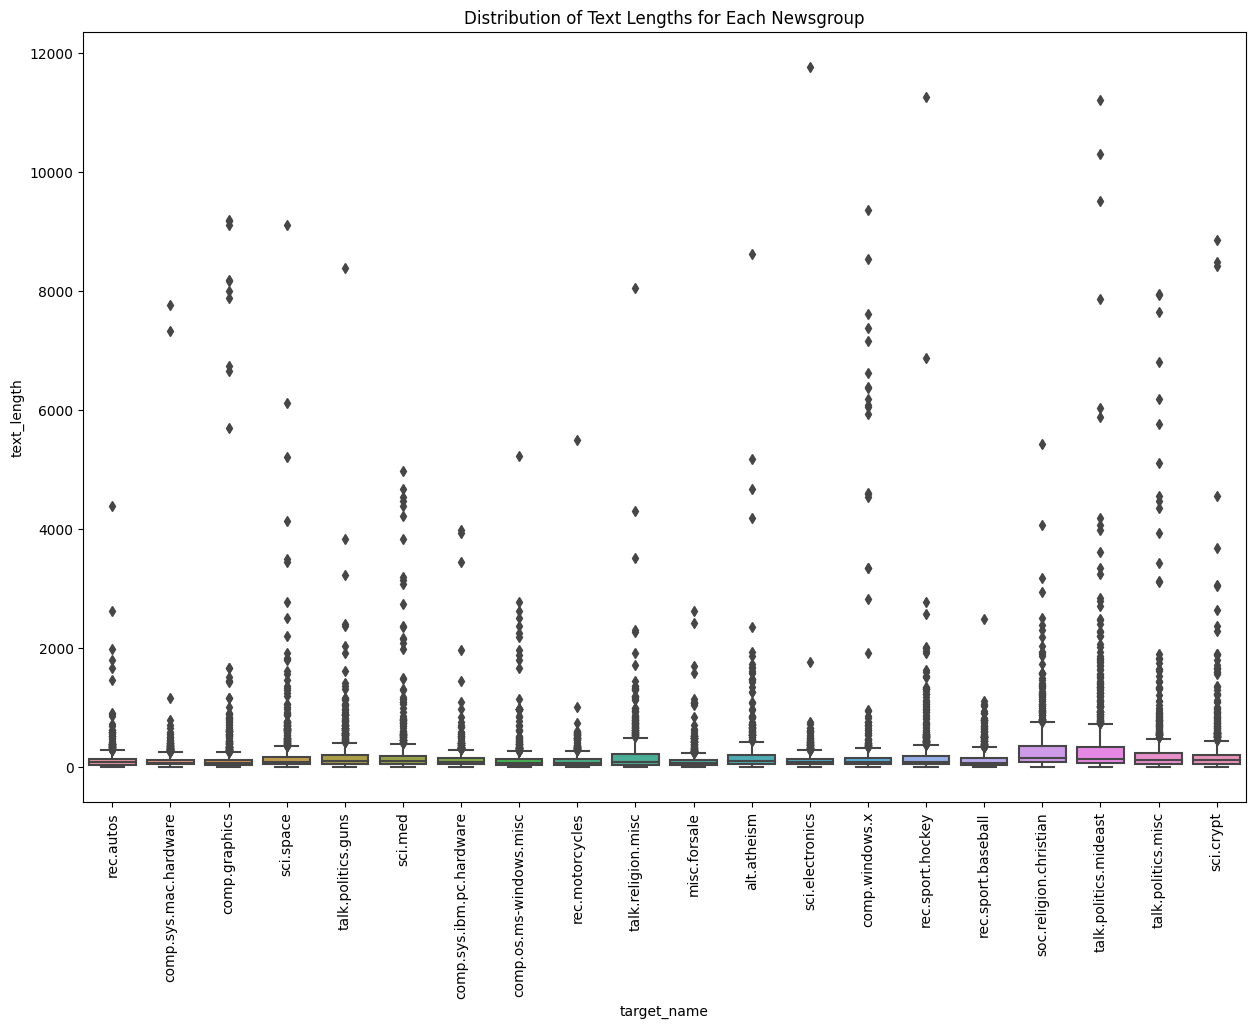

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize

# Combine the training and testing data
X = X_train + X_test
y = list(y_train) + list(y_test)

# Create a DataFrame from the combined data
data = pd.DataFrame({'text': X, 'target': y, 'target_name': [newsgroups_train.target_names[i] for i in y]})

# Calculate the text length for each row
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

# Create a box plot to visualize the distribution of text lengths for each newsgroup
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Distribution of Text Lengths for Each Newsgroup')
ax = sns.boxplot(x='target_name', y='text_length', data=data)
plt.show()


## 2.5 Word Frequency

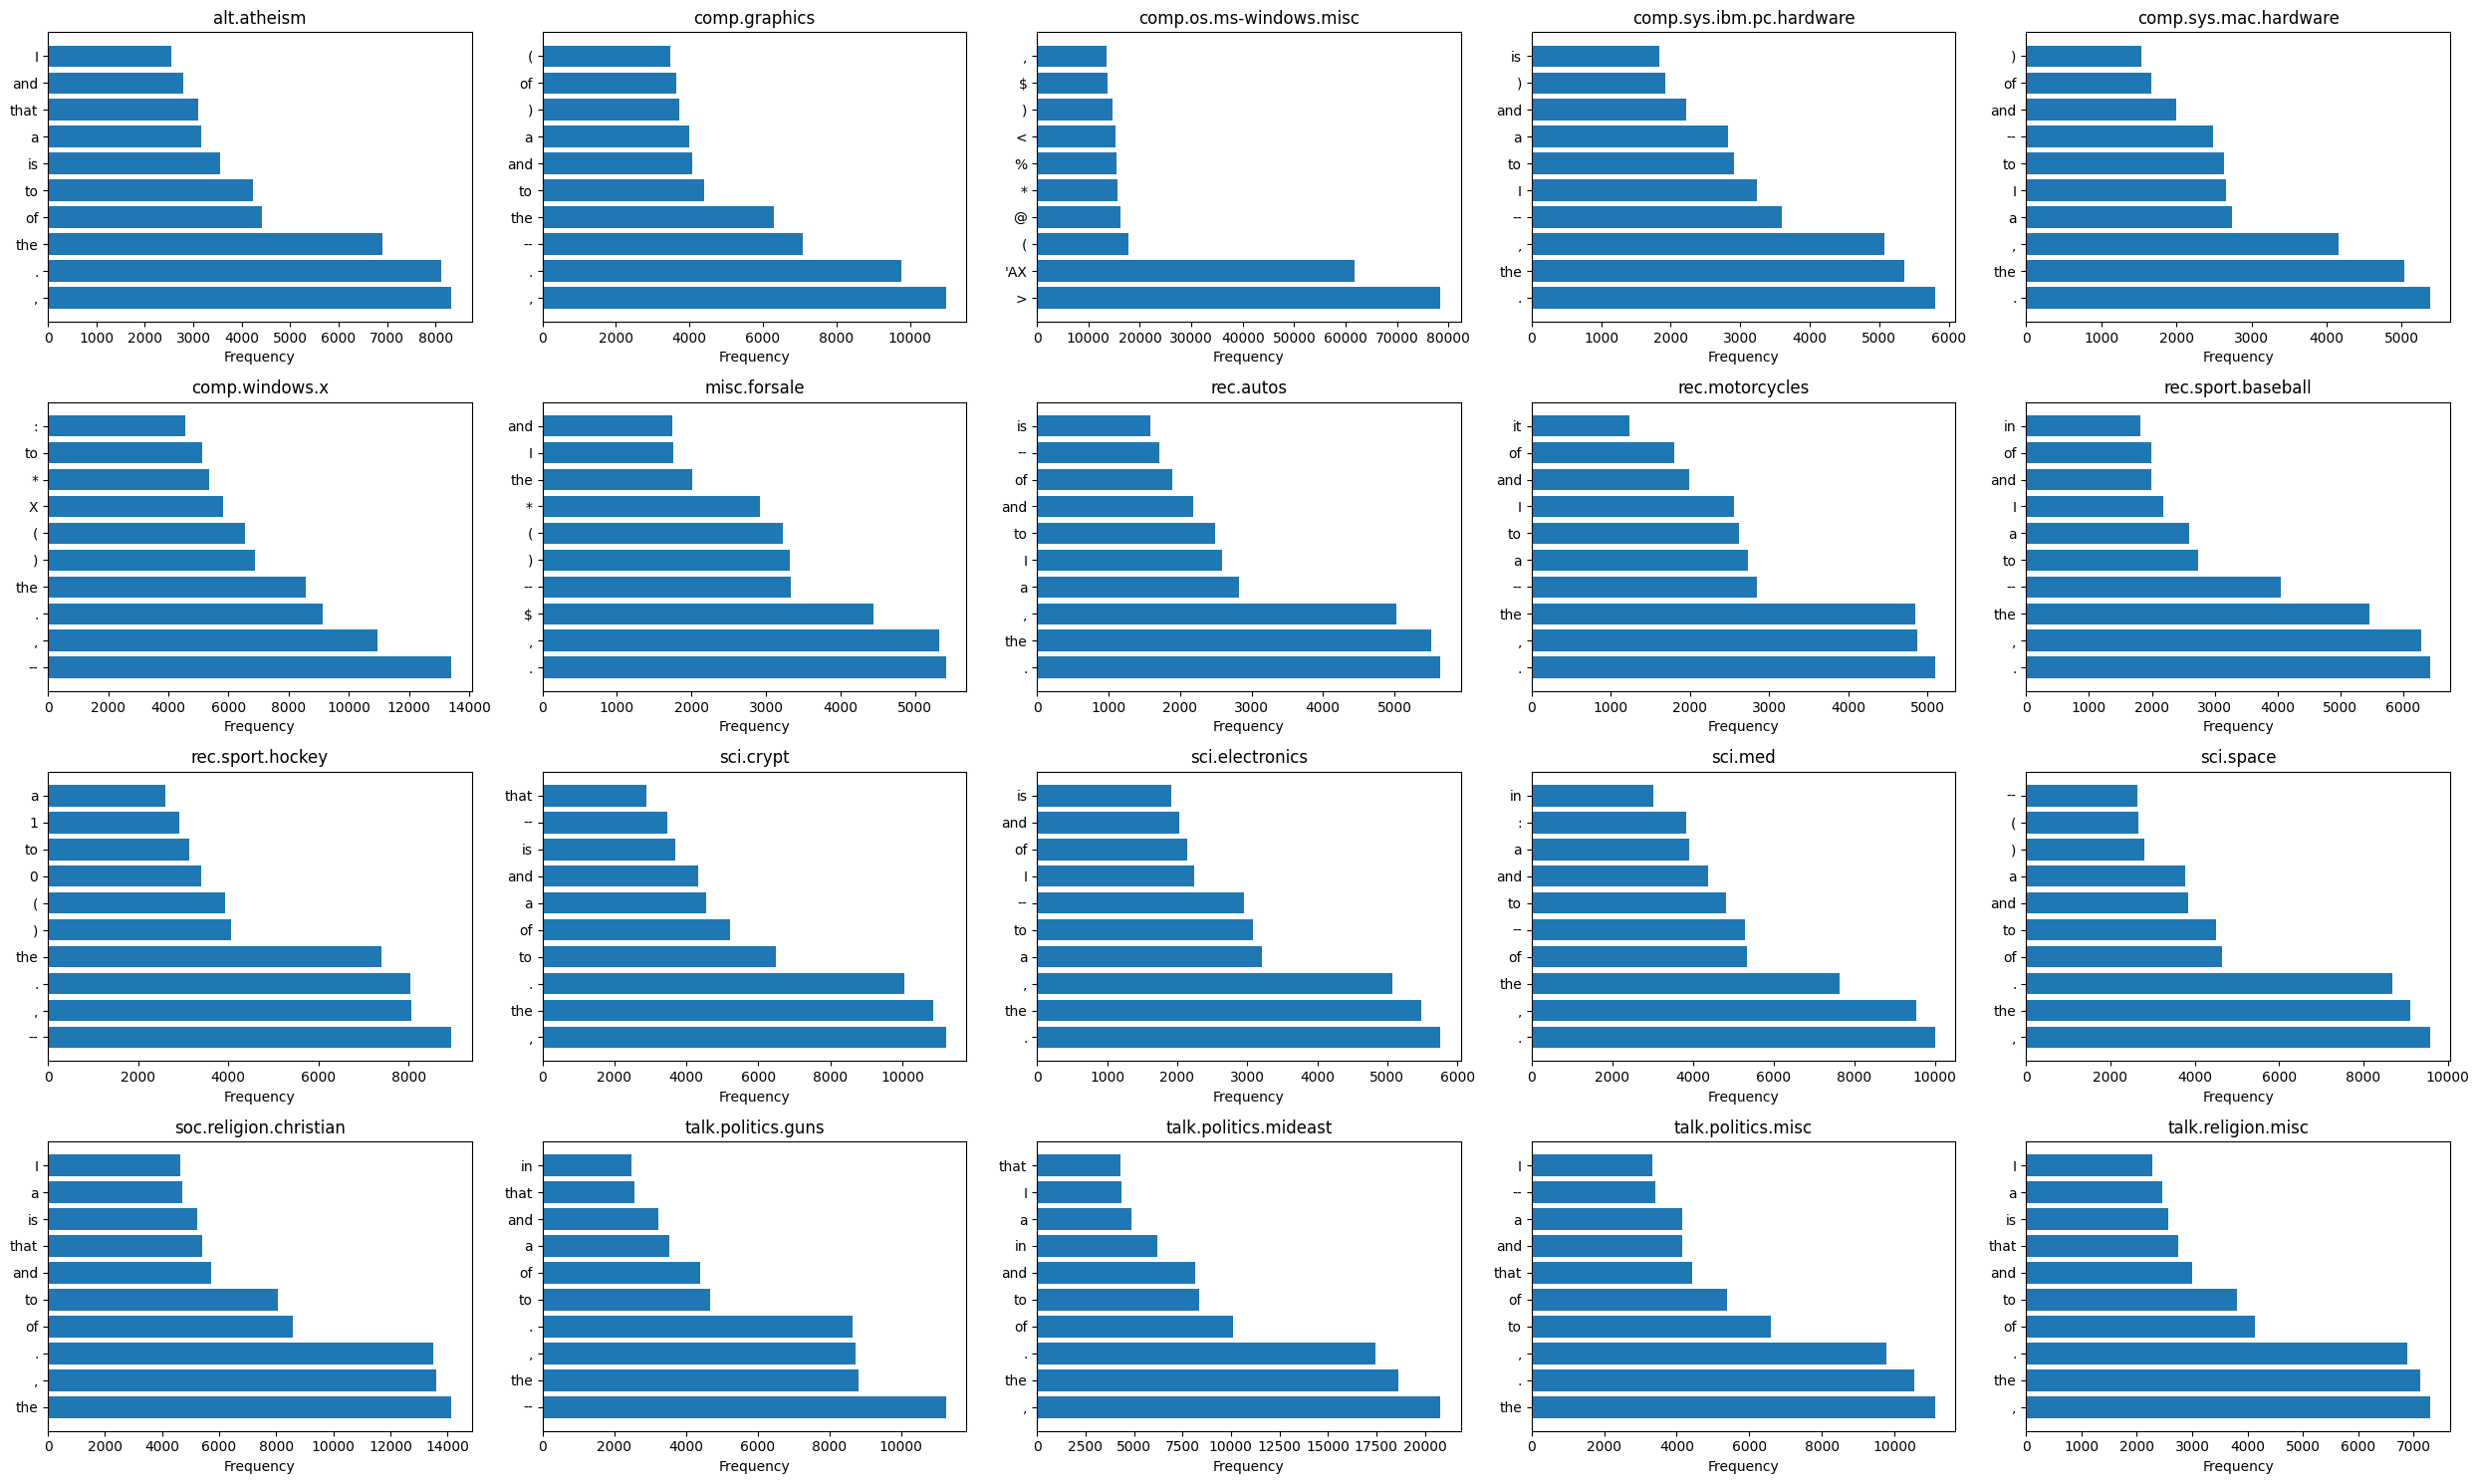

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize

# Create a DataFrame from the data
data = {
    'text': X_train + X_test,
    'target': list(y_train) + list(y_test)
}
df = pd.DataFrame(data)
df['newsgroup'] = df['target'].apply(lambda x: newsgroups_train.target_names[x])

# Define a function to compute the most common words in a list of texts
def most_common_words(texts, n=10):
    words = []
    for text in texts:
        words.extend(word_tokenize(text))
    counter = Counter(words)
    return counter.most_common(n)

# Create a bar plot for each newsgroup
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 15))
axes = axes.flatten()

for i, newsgroup in enumerate(newsgroups_train.target_names):
    texts = df[df['newsgroup'] == newsgroup]['text']
    common_words = most_common_words(texts)
    words, counts = zip(*common_words)
    
    axes[i].barh(words, counts)
    axes[i].set_title(newsgroup)
    axes[i].set_xlabel('Frequency')

plt.tight_layout()
plt.show()


# 3. Clean and Preprocess data


**Note:** We are using intermediate pipelines to preprocess and transform data separately from the full pipeline, which helps to save computational time by avoiding repeated preprocessing during model evaluations. This approach was particularly beneficial when we needed to frequently analyze preprocessed data and prioritize computational efficiency, while still maintaining a separation between preprocessing and model implementation.  However, we need to be mindful of the potential loss of some benefits of a full pipeline in the later stages, such as hyperparameter tuning for preprocessing steps, but we decide not to include this in the scope of our project.

## 3.1 Preprocessing function


### Explanation of code below:

This code defines a custom transformer called TextCleanerPreprocessor, which combines text cleaning and preprocessing tasks. It inherits from BaseEstimator and TransformerMixin to work seamlessly with scikit-learn pipelines. The main steps in this transformer are:

Initialize the transformer and create a WordNetLemmatizer object.
Implement the fit() method, which doesn't modify the data but returns the transformer itself to work with the pipeline.
Implement the transform() method, which processes each text in the input data (X) by:

- a. Removing email addresses.
- b. Removing URLs.
- c. Removing non-alphabetic characters and converting the text to lowercase.
- d. Tokenizing the text into words.
- e. Removing stopwords.
- f. Lemmatizing words to their base forms.
- g. Reconstructing the cleaned and preprocessed text by joining the words.
- h. Appending the cleaned and preprocessed text to a list.
- Return the list containing cleaned and preprocessed text data.

The usage example shows how to create an instance of the transformer and apply it to the training and testing datasets.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions
from multiprocessing import Pool, cpu_count

class TextCleanerPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def _clean_preprocess(self, text):
        # Remove email addresses
        text = re.sub(r'\S*@\S*\s?', '', text)

        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Handle contractions
        text = contractions.fix(text)

        # Remove non-alphabetic characters and convert to lowercase
        text = re.sub(r'[^a-zA-Z]', ' ', text).lower()

        # Tokenize the text
        words = nltk.word_tokenize(text)

        # Remove stopwords
        words = [word for word in words if word not in stopwords.words('english')]

        # Lemmatize the words
        words = [self.lemmatizer.lemmatize(word) for word in words]

        # Reconstruct the cleaned and preprocessed text
        cleaned_preprocessed_text = ' '.join(words)

        return cleaned_preprocessed_text

    def transform(self, X):
        with Pool(cpu_count()) as pool:
            cleaned_preprocessed_data = pool.map(self._clean_preprocess, X)
        return cleaned_preprocessed_data


# cleaner_preprocessor = TextCleanerPreprocessor()
# X_train_cleaned_preprocessed = cleaner_preprocessor.fit_transform(X_train)
# X_test_cleaned_preprocessed = cleaner_preprocessor.transform(X_test)


## 3.2 Intermediate Pipeline - preprocessing



In [ ]:
# Fit and transform the data up to the cleaner_preprocessor step
intermediate_pipeline_cleaning = Pipeline([
    ('cleaner_preprocessor', TextCleanerPreprocessor())
])

# Fit and transform the training data using the intermediate_pipeline
X_train_cleaned_preprocessed = intermediate_pipeline_cleaning.fit_transform(X_train)

# Transform the test data using the intermediate_pipeline
X_test_cleaned_preprocessed = intermediate_pipeline_cleaning.transform(X_test)


# 4. Analyze preprocessed data

## 4.1 Text Length

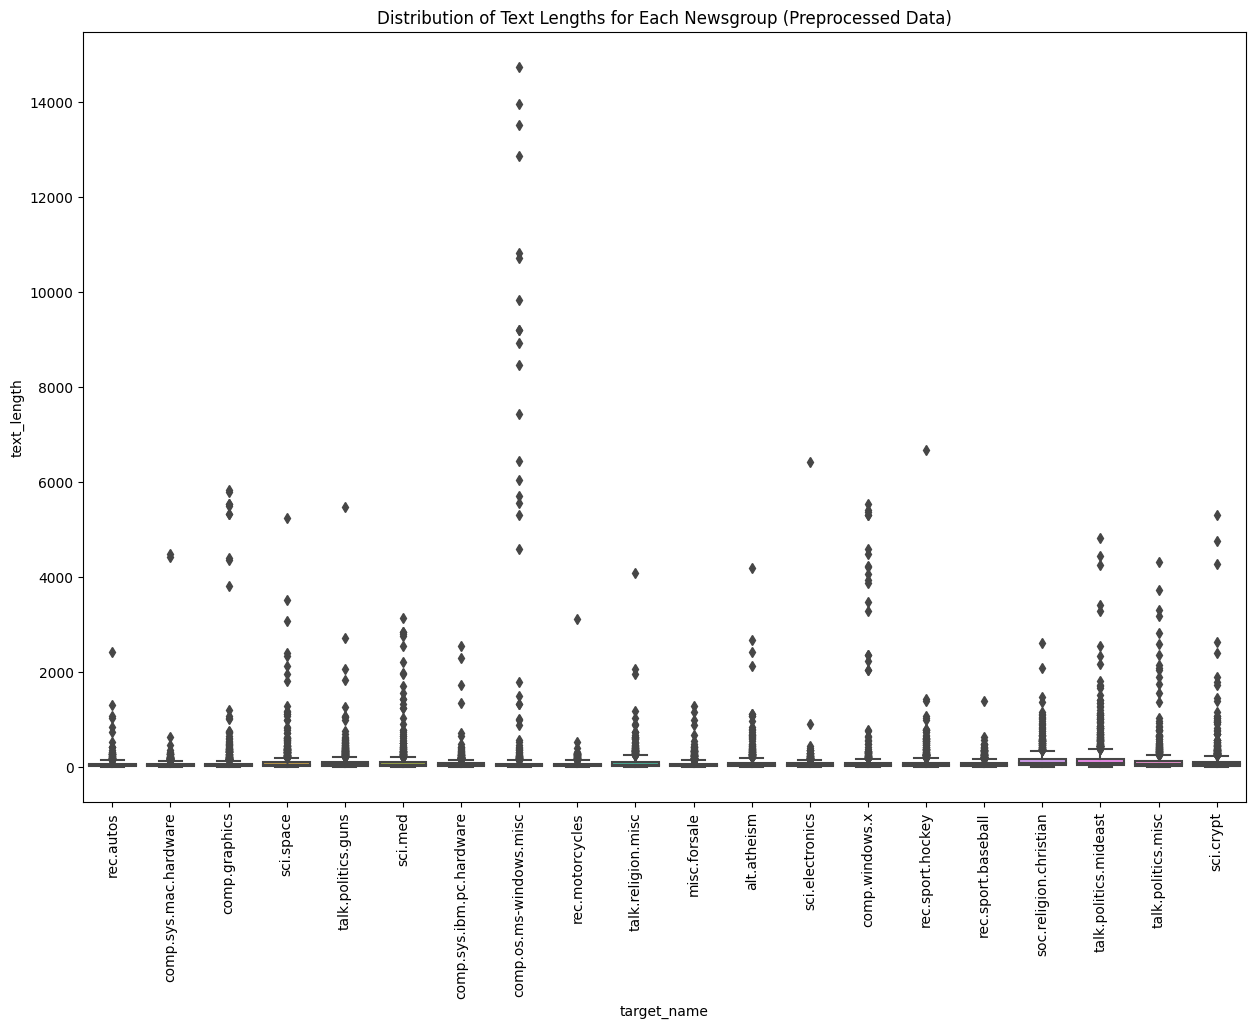

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize

# Combine the training and testing data
X = X_train_cleaned_preprocessed + X_test_cleaned_preprocessed  # Use preprocessed data
y = list(y_train) + list(y_test)

# Create a DataFrame from the combined data
data = pd.DataFrame({'text': X, 'target': y, 'target_name': [newsgroups_train.target_names[i] for i in y]})

# Calculate the text length for each row
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

# Create a box plot to visualize the distribution of text lengths for each newsgroup
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Distribution of Text Lengths for Each Newsgroup (Preprocessed Data)')
ax = sns.boxplot(x='target_name', y='text_length', data=data)
plt.show()


## 4.2 Word Frequency

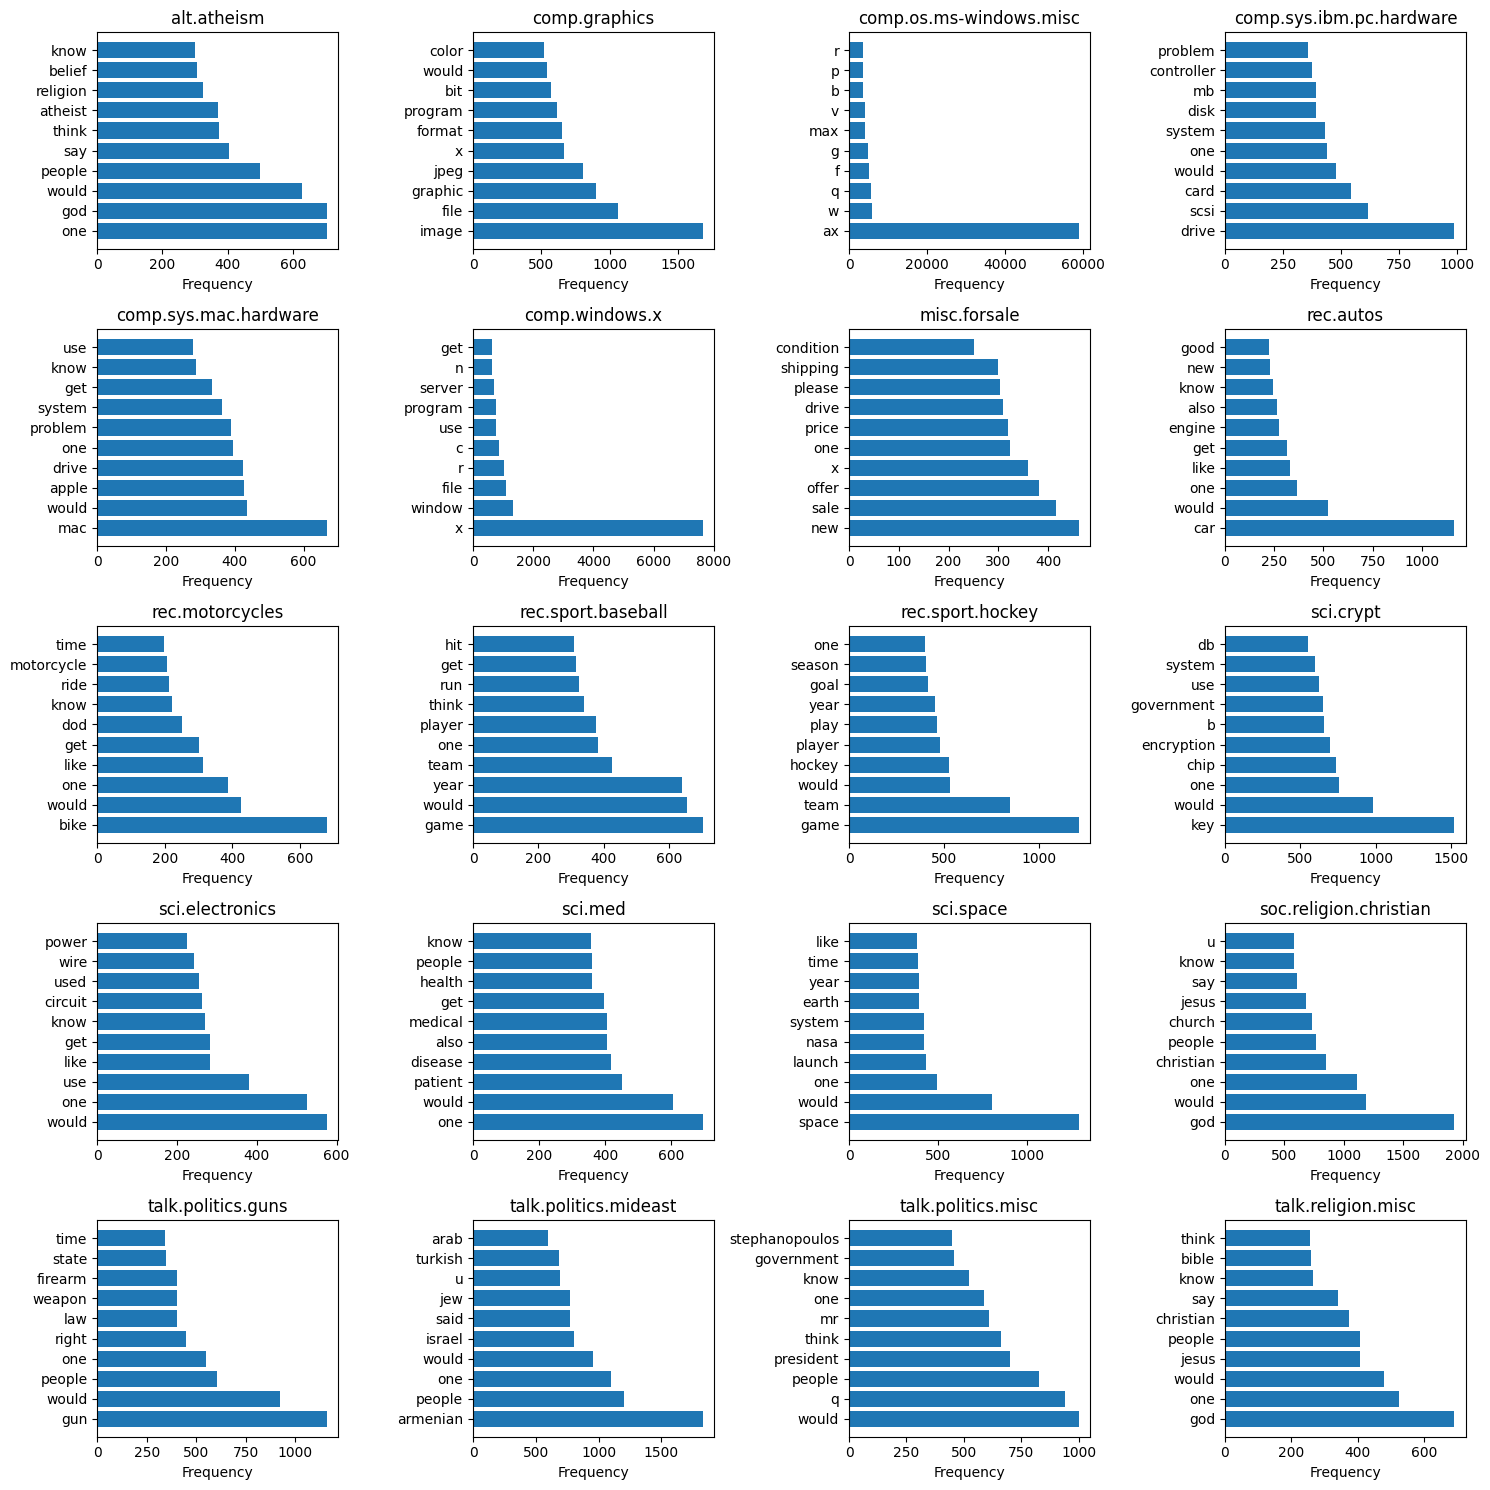

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize

# Create a DataFrame from the data
data = {
    'text': X_train_cleaned_preprocessed + X_test_cleaned_preprocessed,
    'target': list(y_train) + list(y_test)
}
df = pd.DataFrame(data)
df['newsgroup'] = df['target'].apply(lambda x: newsgroups_train.target_names[x])

# Define a function to compute the most common words in a list of texts
def most_common_words(texts, n=10):
    words = []
    for text in texts:
        words.extend(word_tokenize(text))
    counter = Counter(words)
    return counter.most_common(n)

# Create a bar plot for each newsgroup
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for i, newsgroup in enumerate(newsgroups_train.target_names):
    texts = df[df['newsgroup'] == newsgroup]['text']
    common_words = most_common_words(texts)
    words, counts = zip(*common_words)
    
    axes[i].barh(words, counts)
    axes[i].set_title(newsgroup)
    axes[i].set_xlabel('Frequency')

plt.tight_layout()
plt.show()


## 4.3 Intermediate Pipeline - vectorizer

In [ ]:
# Fit and transform the data up to the TfidfVectorizer step
intermediate_pipeline_vectorization = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 3)))
])

# Fit and transform the training data using the intermediate_pipeline
X_train_processed_vectorized = intermediate_pipeline_vectorization.fit_transform(X_train_cleaned_preprocessed)

# Transform the test data using the intermediate_pipeline
X_test_processed_vectorized = intermediate_pipeline_vectorization.transform(X_test_cleaned_preprocessed)
print("Number of features in the training data:", X_train_processed_vectorized.shape[1])
print("Number of features in the test data:", X_test_processed_vectorized.shape[1])



Number of features in the training data: 1787002
Number of features in the test data: 1787002


## 4.4 Visualizing Top Features with TF-IDF Values for Each Newsgroup

In [ ]:
# Count the unique words in X_train_cleaned_preprocessed
unique_words_train = set(X_train_cleaned_preprocessed)
print(len(unique_words_train))

# Count the unique words in X_test_cleaned_preprocessed
unique_words_test = set(X_test_cleaned_preprocessed)
print(len(unique_words_test))

10942
7271


In [ ]:
unique_words_train = set()
unique_words_test = set()

for doc in X_train_cleaned_preprocessed:
    for word in doc.split():
        unique_words_train.add(word)

for doc in X_test_cleaned_preprocessed:
    for word in doc.split():
        unique_words_test.add(word)

print("Number of unique words in the training data:", len(unique_words_train))
print("Number of unique words in the test data:", len(unique_words_test))


Number of unique words in the training data: 60164
Number of unique words in the test data: 46440


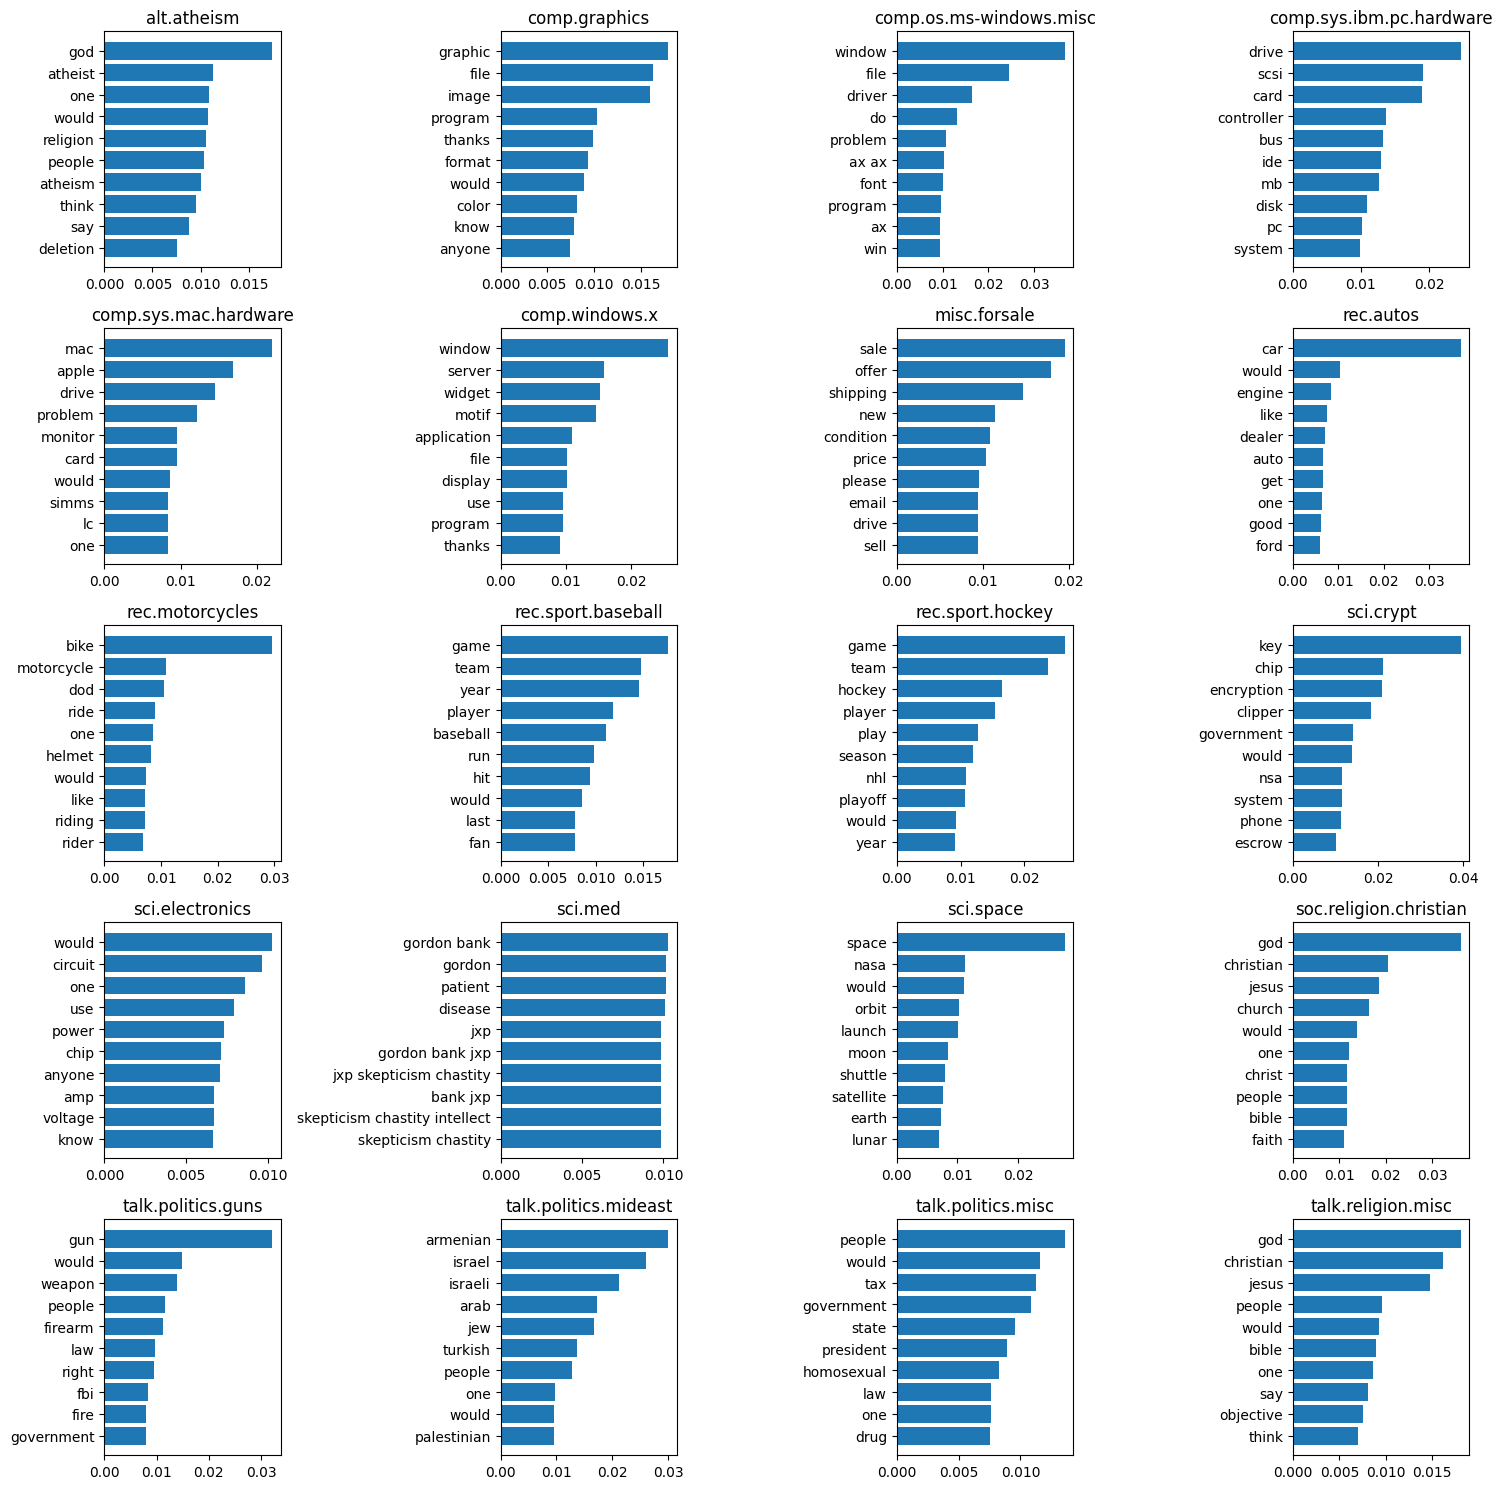

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the TfidfVectorizer instance and feature names from the intermediate_pipeline
vectorizer = intermediate_pipeline_vectorization.named_steps['vectorizer']
feature_names = np.array(vectorizer.get_feature_names_out())

# Get the target names from the newsgroups_train
target_names = newsgroups_train.target_names

# Number of top features to display
n_top_features = 10

# Convert X_train_processed_vectorized to a dense NumPy array
X_train_processed_vectorized_dense = X_train_processed_vectorized.toarray()

# Create a bar plot for each newsgroup
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
axes = axes.ravel()

for i, target_name in enumerate(target_names):
    # Get the indices of the top n_top_features for the current newsgroup
    top_feature_indices = X_train_processed_vectorized_dense[y_train == i].mean(axis=0).argsort()[-n_top_features:][::-1]
    
    # Get the top features and their corresponding TF-IDF values
    top_features = feature_names[top_feature_indices]
    tfidf_values = X_train_processed_vectorized_dense[y_train == i].mean(axis=0)[top_feature_indices]

    # Create a bar plot for the current newsgroup
    axes[i].barh(top_features, tfidf_values)
    axes[i].set_title(target_name)
    axes[i].invert_yaxis()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


## 4.5 Word Clouds

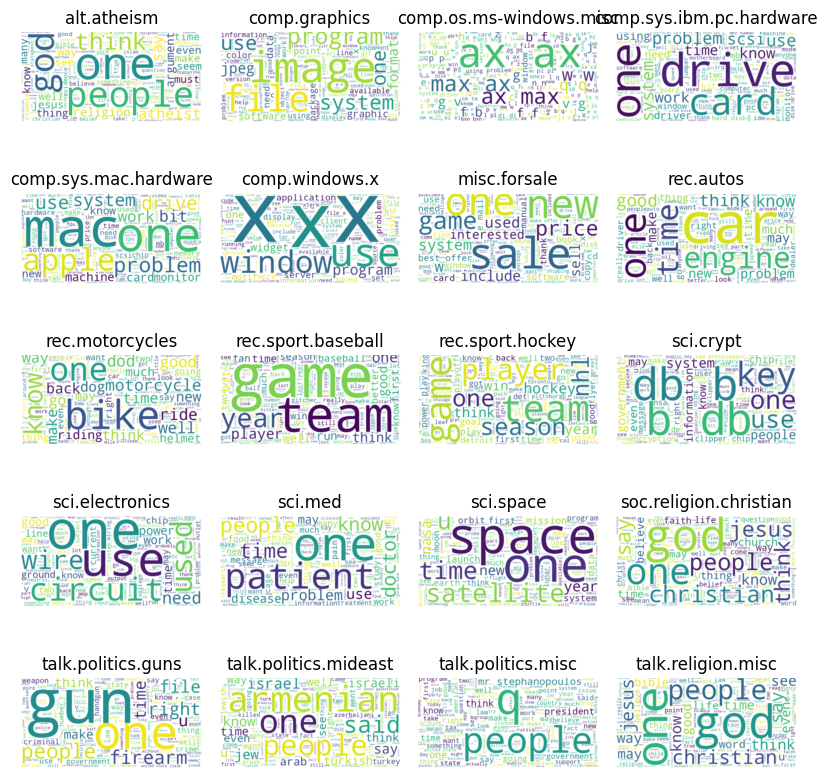

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.datasets import fetch_20newsgroups
from matplotlib.gridspec import GridSpec

# Group the preprocessed documents by their target newsgroup
grouped_docs = {group: [] for group in newsgroups_train.target_names}
for text, target in zip(X_train_cleaned_preprocessed, newsgroups_train.target):
    grouped_docs[newsgroups_train.target_names[target]].append(text)

# Create a figure with a specific size
fig = plt.figure(figsize=(10, 10))
grid = GridSpec(5, 4, figure=fig, hspace=0.3, wspace=0.1)

# Create word clouds for each newsgroup and display them in a grid
for index, (group, docs) in enumerate(grouped_docs.items(), start=1):
    all_text = ' '.join(doc for doc in docs)
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_text)
    row = (index - 1) // 4
    col = (index - 1) % 4
    ax = fig.add_subplot(grid[row, col])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(group)

plt.show()


# **PART 2: Model Training and Evaluation**

# 5. Model implementations

### Explanations of model implementation code:

This code defines a scikit-learn Pipeline that consists of three main steps:

- 1. ('cleaner_preprocessor', TextCleanerPreprocessor()): This step applies the custom TextCleanerPreprocessor transformer, which performs text cleaning and preprocessing tasks such as removing email addresses, URLs, non-alphabetic characters, stopwords, and lemmatizing words.

- 2. ('vectorizer', TfidfVectorizer()): This step uses the TfidfVectorizer to convert the cleaned and preprocessed text data into a numerical format. It calculates the Term Frequency-Inverse Document Frequency (TF-IDF) for each word in the dataset, which is a widely used technique in text classification.

- 3. ('classifier', MultinomialNB()): This step applies the MultinomialNB classifier, which is a Naive Bayes classifier suitable for text classification tasks. It uses the numerical representation of the text data from the previous step to learn the classification model. This can be modified for appropiate model.

Once the pipeline is defined, the following steps are performed:

- pipeline.fit(X_train, y_train): Train the model using the training data (X_train and y_train). The pipeline applies each step in sequence, first cleaning and preprocessing the text, then converting it to a numerical format, and finally training the classifier.

- y_pred = pipeline.predict(X_test): Test the model on the testing data (X_test). The pipeline processes the test data in the same way as the training data (cleaning, preprocessing, and vectorizing), and then uses the trained classifier to make predictions. The predicted labels are stored in y_pred.

## 5.2 Multinomial Naive Bayes



### 5.2.1 Model training

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import RandomizedSearchCV

from sklearn.decomposition import TruncatedSVD

pipeline = Pipeline([
    #('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),  # Convert the text data into a numerical format
    #('feature_selection', SelectKBest(chi2, k=1200000)),    # Feature selection
    ('classifier', MultinomialNB())                       # Apply the Naive Bayes classifier
])


# Train the model
pipeline.fit(X_train_processed_vectorized, y_train)

# Test the model
y_pred = pipeline.predict(X_test_processed_vectorized)


### 5.2.2 Model evaluation

#### Classification report

In [ ]:
from sklearn.metrics import classification_report

# Compute and display the classification report
report = classification_report(y_test, y_pred, target_names=newsgroups_test.target_names)
print(report)


                          precision    recall  f1-score   support

             alt.atheism       0.81      0.12      0.21       319
           comp.graphics       0.69      0.66      0.67       389
 comp.os.ms-windows.misc       0.67      0.57      0.62       394
comp.sys.ibm.pc.hardware       0.58      0.76      0.65       392
   comp.sys.mac.hardware       0.81      0.61      0.69       385
          comp.windows.x       0.73      0.79      0.76       395
            misc.forsale       0.81      0.77      0.79       390
               rec.autos       0.85      0.69      0.76       396
         rec.motorcycles       0.88      0.70      0.78       398
      rec.sport.baseball       0.92      0.77      0.84       397
        rec.sport.hockey       0.57      0.94      0.71       399
               sci.crypt       0.55      0.80      0.65       396
         sci.electronics       0.71      0.50      0.59       393
                 sci.med       0.84      0.75      0.80       396
         

### 5.2.3 Hyperparamter optimization

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),                     # Convert the text data into a numerical format
    #('feature_selection', SelectKBest(chi2, k=10000)),    # Feature selection
    ('classifier', MultinomialNB())                        # Apply the Naive Bayes classifier
])


# Define hyperparameter search space
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1,3)],  # n-grams
    'vectorizer__max_df': [0.5, 0.75, 1.0],
    'vectorizer__min_df': [1, 2, 5],
    'classifier__alpha': [0.001, 0.01, 0.1, 1.0, 1.1, 1.2, 2.0, 2.2, 3.0],  # α (alpha) values to be searched
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Train the model with the best hyperparameters
grid_search.fit(X_train_cleaned_preprocessed, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Test the model
y_pred = grid_search.predict(X_test_cleaned_preprocessed)

Best hyperparameters: {'classifier__alpha': 0.01, 'vectorizer__max_df': 0.5, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 2)}


### 5.2.4 Optimized model evaluation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=1)),  # Convert the text data into a numerical format
    ('classifier', MultinomialNB(alpha=0.01))  # Apply the Naive Bayes classifier with the best alpha
])

# Train the model
pipeline.fit(X_train_cleaned_preprocessed, y_train)

# Test the model
y_pred = pipeline.predict(X_test_cleaned_preprocessed)


#### Classification report

In [ ]:
from sklearn.metrics import classification_report

# Compute and display the classification report
report = classification_report(y_test, y_pred, target_names=newsgroups_test.target_names)
print(report)


                          precision    recall  f1-score   support

             alt.atheism       0.67      0.43      0.52       319
           comp.graphics       0.64      0.71      0.67       389
 comp.os.ms-windows.misc       0.67      0.58      0.62       394
comp.sys.ibm.pc.hardware       0.60      0.70      0.64       392
   comp.sys.mac.hardware       0.73      0.64      0.68       385
          comp.windows.x       0.79      0.74      0.76       395
            misc.forsale       0.81      0.74      0.77       390
               rec.autos       0.79      0.70      0.74       396
         rec.motorcycles       0.78      0.72      0.75       398
      rec.sport.baseball       0.92      0.81      0.86       397
        rec.sport.hockey       0.60      0.93      0.73       399
               sci.crypt       0.71      0.78      0.74       396
         sci.electronics       0.74      0.57      0.64       393
                 sci.med       0.81      0.79      0.80       396
         

#### Confusion matrix

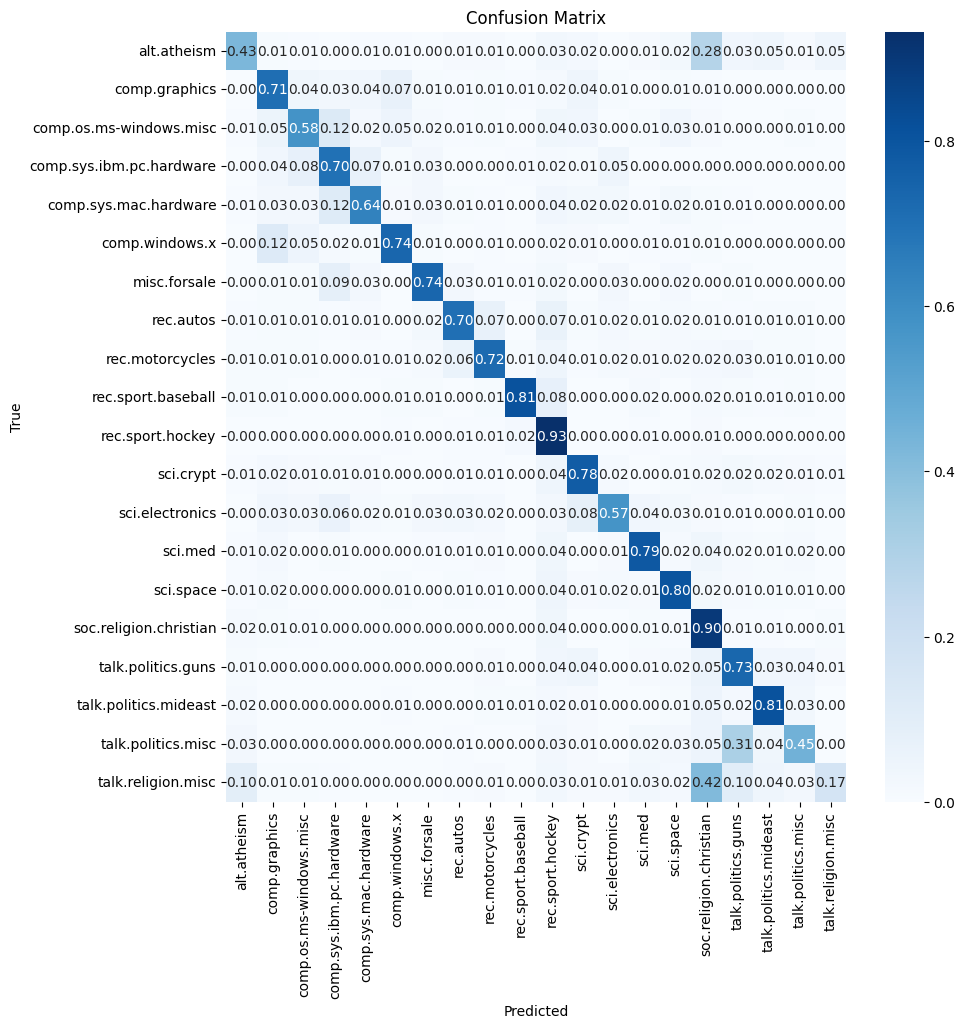

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f', xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[137   3   2   1   2   2   0   4   4   1  10   6   1   4   7  90  11  15
    4  15]
 [  1 276  15  12  14  28   3   2   4   2   6  16   3   0   4   2   0   1
    0   0]
 [  2  21 227  49   8  19   6   2   4   1  15  13   1   3  13   5   1   0
    4   0]
 [  0  14  30 273  28   4  11   0   1   2   7   3  18   0   1   0   0   0
    0   0]
 [  2  10  11  46 246   5  10   4   2   0  14   9   9   2   9   3   2   0
    0   1]
 [  0  48  20   7   4 291   4   0   2   0   6   5   1   2   2   3   0   0
    0   0]
 [  0   4   3  34  11   0 287  11   2   2   9   1  11   1   8   1   3   1
    1   0]
 [  2   4   3   2   5   0   9 279  28   1  26   4   8   4   7   4   2   3
    4   1]
 [  4   3   3   0   2   2   6  24 287   3  16   2   6   5   7   8  11   4
    4   1]
 [  3   4   0   0   1   3   3   1   4 321  31   1   1   7   1   7   4   2
    3   0]
 [  0   0   0   0   1   2   0   2   2   8 372   1   1   2   0   5   1   1
    1   0]
 [  2   8   5   4   5   1   1   2   2   1  17 3

## 5.3.0 Tokenizing and padding for CNN and LSTM

In [ ]:
class TokenizerPadder(BaseEstimator, TransformerMixin):
    def __init__(self, max_sequence_length=294, max_words=20000):
        self.max_sequence_length = max_sequence_length
        self.max_words = max_words

    def fit(self, X, y=None):
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X)
        return self

    def _tokenize_pad(self, text):
        sequences = self.tokenizer.texts_to_sequences([text])
        padded_sequences = pad_sequences(sequences, maxlen=self.max_sequence_length)
        return padded_sequences[0]

    def transform(self, X):
        with Pool(cpu_count()) as pool:
            tokenized_padded_data = np.array(pool.map(self._tokenize_pad, X))
        return tokenized_padded_data


# # Instantiate the TokenizerPadder and tokenize and pad the text data
# tokenizer_padder = TokenizerPadder()
# X_train_tok_pad = tokenizer_padder.fit_transform(X_train_cleaned_preprocessed)
# X_test_tok_pad = tokenizer_padder.transform(X_test_cleaned_preprocessed)

### Tokenizer and Padder Intermediate Pipeline

In [ ]:
# Fit and transform the data up to the tokenizer_padder step
intermediate_pipeline_tokenizer_padder = Pipeline([
    ('tokenizer_padder', TokenizerPadder())
])

# Fit and transform the training data using the intermediate_pipeline
X_train_tok_pad = intermediate_pipeline_tokenizer_padder.fit_transform(X_train_cleaned_preprocessed)

# Transform the test data using the intermediate_pipeline
X_test_tok_pad = intermediate_pipeline_tokenizer_padder.transform(X_test_cleaned_preprocessed)


Mean: 110.00583348064345
Max: 13963
Median: 43.0
Standard Deviation: 459.1185731431113


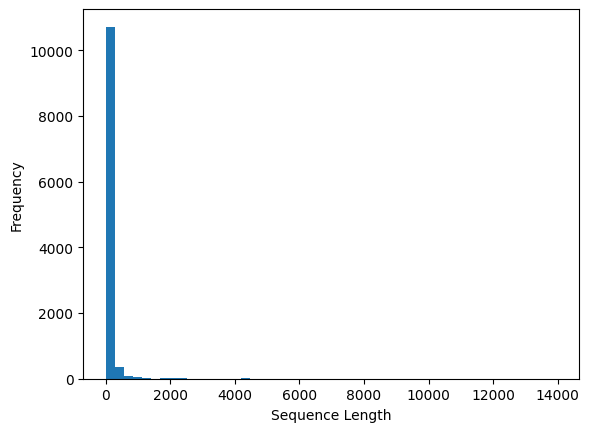

Max sequence length: 294


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume that `X_train_cleaned_preprocessed` contains the preprocessed text data
sequence_lengths = [len(doc.split()) for doc in X_train_cleaned_preprocessed]

# Calculate descriptive statistics
mean_length = np.mean(sequence_lengths)
max_length = np.max(sequence_lengths)
median_length = np.median(sequence_lengths)
std_length = np.std(sequence_lengths)

print("Mean:", mean_length)
print("Max:", max_length)
print("Median:", median_length)
print("Standard Deviation:", std_length)

# Plot a histogram
plt.hist(sequence_lengths, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

# Choose a value that covers a significant portion of the data
max_sequence_length = int(np.percentile(sequence_lengths, 95))  # 95th percentile
print("Max sequence length:", max_sequence_length)


## 5.3 LSTM with GloVe.6B (100d) 

### 5.3.1 Model building

In [ ]:
import numpy as np

glove_embeddings = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

max_words = 50000  # or another value you prefer


embedding_dim = 100  # GloVe embeddings have 100 dimensions
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in intermediate_pipeline_tokenizer_padder.named_steps['tokenizer_padder'].tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=20, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 294, 100)          5000000   
                                                                 
 lstm (LSTM)                 (None, 294, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 20)                1300      
                                                                 
Total params: 5,167,956
Trainable params: 167,956
Non-trainable params: 5,000,000
_________________________________________________________________


### 5.3.2 Adding Validation to LSTM Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train_tok_pad, y_train, test_size=0.1, random_state=42)



### 5.3.3 Training and evaluating the model

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(X_train2, y_train2, epochs=20, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tok_pad, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/20
80/80 [==============================] - 11s 37ms/step - loss: 2.2455 - accuracy: 0.2809 - val_loss: 1.8450 - val_accuracy: 0.3878
Epoch 2/20
80/80 [==============================] - 2s 25ms/step - loss: 1.6998 - accuracy: 0.4365 - val_loss: 1.6587 - val_accuracy: 0.4532
Epoch 3/20
80/80 [==============================] - 2s 24ms/step - loss: 1.5367 - accuracy: 0.4925 - val_loss: 1.4919 - val_accuracy: 0.5088
Epoch 4/20
80/80 [==============================] - 2s 24ms/step - loss: 1.4110 - accuracy: 0.5401 - val_loss: 1.4675 - val_accuracy: 0.5300
Epoch 5/20
80/80 [==============================] - 2s 24ms/step - loss: 1.3169 - accuracy: 0.5778 - val_loss: 1.3879 - val_accuracy: 0.5451
Epoch 6/20
80/80 [==============================] - 2s 24ms/step - loss: 1.2378 - accuracy: 0.5959 - val_loss: 1.3736 - val_accuracy: 0.5627
Epoch 7/20
80/80 [==============================] - 2s 24ms/step - loss: 1.2288 - accuracy: 0.6010 - val_loss: 1.3248 - val_accuracy: 0.5866
Epoch 8/20
8

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X_test_tok_pad)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=newsgroups_test.target_names))


236/236 [==============================] - 3s 8ms/step
                          precision    recall  f1-score   support

             alt.atheism       0.31      0.55      0.40       319
           comp.graphics       0.49      0.58      0.53       389
 comp.os.ms-windows.misc       0.44      0.58      0.50       394
comp.sys.ibm.pc.hardware       0.59      0.35      0.44       392
   comp.sys.mac.hardware       0.56      0.45      0.50       385
          comp.windows.x       0.70      0.39      0.50       395
            misc.forsale       0.62      0.74      0.67       390
               rec.autos       0.42      0.74      0.53       396
         rec.motorcycles       0.66      0.61      0.63       398
      rec.sport.baseball       0.75      0.71      0.73       397
        rec.sport.hockey       0.93      0.77      0.84       399
               sci.crypt       0.53      0.61      0.57       396
         sci.electronics       0.47      0.50      0.49       393
                 sci

## 5.4 LSTM GloVe.6B (200d)

### 5.4.1 Model building

In [ ]:
glove_file_path = 'glove.6B.200d.txt'

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove_embeddings(glove_file_path)

max_words = 20000  # or another value you prefer


embedding_dim = 200  # GloVe embeddings have 200 dimensions
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in intermediate_pipeline_tokenizer_padder.named_steps['tokenizer_padder'].tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector




model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=20, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 294, 200)          4000000   
                                                                 
 lstm_2 (LSTM)               (None, 294, 128)          168448    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 4,219,156
Trainable params: 219,156
Non-trainable params: 4,000,000
_________________________________________________________________


### 5.4.2 Adding Validation to LSTM Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train_tok_pad, y_train, test_size=0.1, random_state=42)



### 5.4.3 Training and evaluating the model

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(X_train2, y_train2, epochs=40, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tok_pad, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/40
80/80 [==============================] - 6s 34ms/step - loss: 2.2390 - accuracy: 0.2918 - val_loss: 1.8544 - val_accuracy: 0.4178
Epoch 2/40
80/80 [==============================] - 2s 25ms/step - loss: 1.5938 - accuracy: 0.4788 - val_loss: 1.5555 - val_accuracy: 0.5088
Epoch 3/40
80/80 [==============================] - 2s 25ms/step - loss: 1.4429 - accuracy: 0.5291 - val_loss: 1.4448 - val_accuracy: 0.5362
Epoch 4/40
80/80 [==============================] - 2s 25ms/step - loss: 1.2994 - accuracy: 0.5782 - val_loss: 1.3673 - val_accuracy: 0.5495
Epoch 5/40
80/80 [==============================] - 2s 25ms/step - loss: 1.2310 - accuracy: 0.6063 - val_loss: 1.3398 - val_accuracy: 0.5645
Epoch 6/40
80/80 [==============================] - 2s 25ms/step - loss: 1.1312 - accuracy: 0.6383 - val_loss: 1.2655 - val_accuracy: 0.5936
Epoch 7/40
80/80 [==============================] - 2s 25ms/step - loss: 1.0631 - accuracy: 0.6573 - val_loss: 1.2404 - val_accuracy: 0.6113
Epoch 8/40
80

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X_test_tok_pad)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=newsgroups_test.target_names))


236/236 [==============================] - 3s 8ms/step
                          precision    recall  f1-score   support

             alt.atheism       0.41      0.30      0.35       319
           comp.graphics       0.60      0.61      0.61       389
 comp.os.ms-windows.misc       0.56      0.52      0.54       394
comp.sys.ibm.pc.hardware       0.55      0.56      0.55       392
   comp.sys.mac.hardware       0.58      0.55      0.57       385
          comp.windows.x       0.71      0.59      0.65       395
            misc.forsale       0.70      0.66      0.68       390
               rec.autos       0.66      0.65      0.66       396
         rec.motorcycles       0.42      0.66      0.51       398
      rec.sport.baseball       0.80      0.74      0.76       397
        rec.sport.hockey       0.79      0.88      0.83       399
               sci.crypt       0.60      0.65      0.62       396
         sci.electronics       0.50      0.44      0.47       393
                 sci

## 5.5 LSTM with GloVe.6B (300d)

### 5.5.1 Model building

In [ ]:
glove_file_path = 'glove.6B.300d.txt'

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove_embeddings(glove_file_path)

max_words = 20000  # or another value you prefer


embedding_dim = 300  # GloVe embeddings have 300 dimensions
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in intermediate_pipeline_tokenizer_padder.named_steps['tokenizer_padder'].tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector



model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=20, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_491"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_491 (Embedding)   (None, 294, 300)          6000000   
                                                                 
 lstm_982 (LSTM)             (None, 294, 256)          570368    
                                                                 
 lstm_983 (LSTM)             (None, 128)               197120    
                                                                 
 dense_491 (Dense)           (None, 20)                2580      
                                                                 
Total params: 6,770,068
Trainable params: 770,068
Non-trainable params: 6,000,000
_________________________________________________________________


### 5.5.2 Adding Validation to LSTM Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train_tok_pad, y_train, test_size=0.1, random_state=42)



### 5.5.3 Training and evaluating the model

In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train2, y_train2, epochs=40, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tok_pad, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)



Epoch 1/40
637/637 [==============================] - 18s 22ms/step - loss: 1.8130 - accuracy: 0.4082 - val_loss: 1.5643 - val_accuracy: 0.4965
Epoch 2/40
637/637 [==============================] - 13s 21ms/step - loss: 1.3574 - accuracy: 0.5565 - val_loss: 1.4078 - val_accuracy: 0.5565
Epoch 3/40
637/637 [==============================] - 14s 21ms/step - loss: 1.1820 - accuracy: 0.6216 - val_loss: 1.2987 - val_accuracy: 0.6140
Epoch 4/40
637/637 [==============================] - 14s 21ms/step - loss: 0.9892 - accuracy: 0.6841 - val_loss: 1.2289 - val_accuracy: 0.6254
Epoch 5/40
637/637 [==============================] - 15s 23ms/step - loss: 0.8685 - accuracy: 0.7273 - val_loss: 1.2540 - val_accuracy: 0.6263
Epoch 6/40
637/637 [==============================] - 14s 21ms/step - loss: 0.7706 - accuracy: 0.7557 - val_loss: 1.2158 - val_accuracy: 0.6458
Epoch 7/40
637/637 [==============================] - 13s 21ms/step - loss: 0.8657 - accuracy: 0.7344 - val_loss: 1.2451 - val_accuracy:

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X_test_tok_pad)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=newsgroups_test.target_names))


236/236 [==============================] - 3s 10ms/step
                          precision    recall  f1-score   support

             alt.atheism       0.44      0.34      0.38       319
           comp.graphics       0.57      0.55      0.56       389
 comp.os.ms-windows.misc       0.60      0.53      0.57       394
comp.sys.ibm.pc.hardware       0.56      0.53      0.54       392
   comp.sys.mac.hardware       0.59      0.55      0.57       385
          comp.windows.x       0.69      0.65      0.67       395
            misc.forsale       0.75      0.70      0.72       390
               rec.autos       0.66      0.69      0.67       396
         rec.motorcycles       0.67      0.63      0.65       398
      rec.sport.baseball       0.87      0.75      0.81       397
        rec.sport.hockey       0.85      0.84      0.85       399
               sci.crypt       0.63      0.61      0.62       396
         sci.electronics       0.48      0.53      0.50       393
                 sc

### 5.5.4 Training and evaluating model without using validation data

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='accuracy', patience=3)

model.fit(X_train_tok_pad, y_train, epochs=40, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tok_pad, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/40
354/354 [==============================] - 8s 22ms/step - loss: 0.4356 - accuracy: 0.8757
Epoch 2/40
354/354 [==============================] - 8s 22ms/step - loss: 0.3358 - accuracy: 0.9064
Epoch 3/40
354/354 [==============================] - 8s 22ms/step - loss: 0.2756 - accuracy: 0.9224
Epoch 4/40
354/354 [==============================] - 8s 22ms/step - loss: 0.2209 - accuracy: 0.9382
Epoch 5/40
354/354 [==============================] - 8s 22ms/step - loss: 0.1890 - accuracy: 0.9479
Epoch 6/40
354/354 [==============================] - 8s 22ms/step - loss: 0.1785 - accuracy: 0.9509
Epoch 7/40
354/354 [==============================] - 8s 22ms/step - loss: 0.1871 - accuracy: 0.9459
Epoch 8/40
354/354 [==============================] - 8s 22ms/step - loss: 0.1523 - accuracy: 0.9574
Epoch 9/40
354/354 [==============================] - 8s 22ms/step - loss: 0.1790 - accuracy: 0.9475
Epoch 10/40
354/354 [==============================] - 8s 22ms/step - loss: 0.1435 - accura

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X_test_tok_pad)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=newsgroups_test.target_names))


236/236 [==============================] - 2s 10ms/step
                          precision    recall  f1-score   support

             alt.atheism       0.42      0.44      0.43       319
           comp.graphics       0.55      0.56      0.55       389
 comp.os.ms-windows.misc       0.51      0.54      0.52       394
comp.sys.ibm.pc.hardware       0.53      0.52      0.53       392
   comp.sys.mac.hardware       0.59      0.54      0.56       385
          comp.windows.x       0.74      0.52      0.61       395
            misc.forsale       0.65      0.74      0.69       390
               rec.autos       0.46      0.73      0.56       396
         rec.motorcycles       0.64      0.63      0.64       398
      rec.sport.baseball       0.83      0.73      0.78       397
        rec.sport.hockey       0.75      0.82      0.79       399
               sci.crypt       0.75      0.56      0.64       396
         sci.electronics       0.53      0.43      0.48       393
                 sc

### 5.5.5 Hyperparamater optimization (300 Dimensions)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train_tok_pad, y_train, test_size=0.1, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(lstm_units_1=128, lstm_units_2=64, dense_units=20):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                        weights=[embedding_matrix], trainable=False))
    model.add(LSTM(units=lstm_units_1, return_sequences=True))
    model.add(LSTM(units=lstm_units_2))
    model.add(Dense(units=dense_units, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

max_words = 20000  # or another value you prefer

param_grid = {
    'lstm_units_1': [64, 128, 256],
    'lstm_units_2': [32, 64, 128],
    'dense_units': [10, 20],
    'batch_size': [16, 32, 64]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_tok_pad, y_train)  # Use preprocessed training data here

print("Best score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

# Test the model
y_pred = grid_search.predict(X_test_tok_pad)


<ipython-input-37-47ecb73c5cda>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Best score: 0.668640 using {'batch_size': 32, 'dense_units': 20, 'lstm_units_1': 256, 'lstm_units_2': 64}
354/354 [==============================] - 4s 10ms/step


### 5.5.6 Optimized model evaluation

In [ ]:
glove_file_path = 'glove.6B.300d.txt'

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove_embeddings(glove_file_path)

max_words = 20000  # or another value you prefer


embedding_dim = 300  # GloVe embeddings have 300 dimensions
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in intermediate_pipeline_tokenizer_padder.named_steps['tokenizer_padder'].tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector



model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=20, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 294, 300)          6000000   
                                                                 
 lstm (LSTM)                 (None, 294, 256)          570368    
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 20)                1300      
                                                                 
Total params: 6,653,844
Trainable params: 653,844
Non-trainable params: 6,000,000
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train_tok_pad, y_train, test_size=0.1, random_state=42)

In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train2, y_train2, epochs=40, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tok_pad, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/40
319/319 [==============================] - 17s 27ms/step - loss: 1.9589 - accuracy: 0.3583 - val_loss: 1.6312 - val_accuracy: 0.4691
Epoch 2/40
319/319 [==============================] - 8s 24ms/step - loss: 1.4492 - accuracy: 0.5244 - val_loss: 1.3995 - val_accuracy: 0.5442
Epoch 3/40
319/319 [==============================] - 8s 25ms/step - loss: 1.2719 - accuracy: 0.5911 - val_loss: 1.3770 - val_accuracy: 0.5654
Epoch 4/40
319/319 [==============================] - 8s 24ms/step - loss: 1.1309 - accuracy: 0.6427 - val_loss: 1.2619 - val_accuracy: 0.6166
Epoch 5/40
319/319 [==============================] - 8s 25ms/step - loss: 0.9925 - accuracy: 0.6896 - val_loss: 1.2301 - val_accuracy: 0.6369
Epoch 6/40
319/319 [==============================] - 8s 25ms/step - loss: 0.8776 - accuracy: 0.7248 - val_loss: 1.2736 - val_accuracy: 0.6095
Epoch 7/40
319/319 [==============================] - 8s 24ms/step - loss: 0.8005 - accuracy: 0.7482 - val_loss: 1.2502 - val_accuracy: 0.631

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X_test_tok_pad)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=newsgroups_test.target_names))



236/236 [==============================] - 3s 10ms/step
                          precision    recall  f1-score   support

             alt.atheism       0.41      0.44      0.42       319
           comp.graphics       0.53      0.61      0.57       389
 comp.os.ms-windows.misc       0.60      0.49      0.54       394
comp.sys.ibm.pc.hardware       0.46      0.57      0.51       392
   comp.sys.mac.hardware       0.59      0.45      0.51       385
          comp.windows.x       0.67      0.66      0.66       395
            misc.forsale       0.70      0.67      0.69       390
               rec.autos       0.64      0.64      0.64       396
         rec.motorcycles       0.51      0.70      0.59       398
      rec.sport.baseball       0.83      0.79      0.81       397
        rec.sport.hockey       0.53      0.84      0.65       399
               sci.crypt       0.67      0.59      0.63       396
         sci.electronics       0.57      0.39      0.46       393
                 sc

## 5.6 LSTM with GloVe 840B (300d)

### 5.6.1 Model building

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
glove_file_path = '/content/drive/MyDrive/ML CW2/Code/Word Embeddings/glove.840B.300d.txt'

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            try:
                vector = np.asarray(values[1:], dtype='float32')
                embeddings[word] = vector
            except ValueError:
                # Skip the line if the conversion fails
                continue
    return embeddings

glove_embeddings = load_glove_embeddings(glove_file_path)

max_words = 20000  # or another value you prefer


embedding_dim = 300  # GloVe embeddings have 300 dimensions
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in intermediate_pipeline_tokenizer_padder.named_steps['tokenizer_padder'].tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector




model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=20, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 294, 300)          6000000   
                                                                 
 lstm_2 (LSTM)               (None, 294, 128)          219648    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 6,270,356
Trainable params: 270,356
Non-trainable params: 6,000,000
_________________________________________________________________


### 5.6.2 Adding Validation to LSTM Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train_tok_pad, y_train, test_size=0.1, random_state=42)



### 5.6.3 Training and evaluating the model

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(X_train2, y_train2, epochs=40, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tok_pad, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/40
80/80 [==============================] - 7s 38ms/step - loss: 2.0715 - accuracy: 0.3450 - val_loss: 1.6337 - val_accuracy: 0.4664
Epoch 2/40
80/80 [==============================] - 2s 28ms/step - loss: 1.4166 - accuracy: 0.5424 - val_loss: 1.3485 - val_accuracy: 0.5636
Epoch 3/40
80/80 [==============================] - 2s 28ms/step - loss: 1.2187 - accuracy: 0.6092 - val_loss: 1.2314 - val_accuracy: 0.6113
Epoch 4/40
80/80 [==============================] - 2s 28ms/step - loss: 1.1182 - accuracy: 0.6475 - val_loss: 1.2385 - val_accuracy: 0.6051
Epoch 5/40
80/80 [==============================] - 2s 28ms/step - loss: 1.0395 - accuracy: 0.6744 - val_loss: 1.1509 - val_accuracy: 0.6396
Epoch 6/40
80/80 [==============================] - 2s 28ms/step - loss: 0.9454 - accuracy: 0.7058 - val_loss: 1.1774 - val_accuracy: 0.6378
Epoch 7/40
80/80 [==============================] - 2s 28ms/step - loss: 0.9007 - accuracy: 0.7136 - val_loss: 1.0766 - val_accuracy: 0.6705
Epoch 8/40
80

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X_test_tok_pad)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=newsgroups_test.target_names))


236/236 [==============================] - 3s 9ms/step
                          precision    recall  f1-score   support

             alt.atheism       0.38      0.51      0.44       319
           comp.graphics       0.68      0.60      0.63       389
 comp.os.ms-windows.misc       0.53      0.62      0.58       394
comp.sys.ibm.pc.hardware       0.52      0.61      0.56       392
   comp.sys.mac.hardware       0.71      0.47      0.57       385
          comp.windows.x       0.81      0.60      0.69       395
            misc.forsale       0.78      0.60      0.68       390
               rec.autos       0.45      0.70      0.55       396
         rec.motorcycles       0.74      0.66      0.69       398
      rec.sport.baseball       0.70      0.82      0.76       397
        rec.sport.hockey       0.89      0.81      0.85       399
               sci.crypt       0.60      0.68      0.64       396
         sci.electronics       0.47      0.58      0.52       393
                 sci

### 5.6.4 Hyperparamater optimization

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train_tok_pad, y_train, test_size=0.1, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(lstm_units_1=128, lstm_units_2=64, dense_units=20):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                        weights=[embedding_matrix], trainable=False))
    model.add(LSTM(units=lstm_units_1, return_sequences=True))
    model.add(LSTM(units=lstm_units_2))
    model.add(Dense(units=dense_units, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

max_words = 20000  # or another value you prefer

param_grid = {
    'lstm_units_1': [64, 128, 256],
    'lstm_units_2': [32, 64, 128],
    'batch_size': [16, 32, 64]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_tok_pad, y_train)  # Use preprocessed training data here

print("Best score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

# Test the model
y_pred = grid_search.predict(X_test_tok_pad)


<ipython-input-39-303db0c6851a>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Best score: 0.685876 using {'batch_size': 16, 'lstm_units_1': 256, 'lstm_units_2': 128}
236/236 [==============================] - 3s 11ms/step


### 5.6.5 Optimized model evaluation

In [ ]:
glove_file_path = '/content/drive/MyDrive/ML CW2/Code/Word Embeddings/glove.840B.300d.txt'

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            try:
                vector = np.asarray(values[1:], dtype='float32')
                embeddings[word] = vector
            except ValueError:
                # Skip the line if the conversion fails
                continue
    return embeddings

glove_embeddings = load_glove_embeddings(glove_file_path)

max_words = 20000  # or another value you prefer


embedding_dim = 300  # GloVe embeddings have 300 dimensions
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in intermediate_pipeline_tokenizer_padder.named_steps['tokenizer_padder'].tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector




model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=20, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_87 (Embedding)    (None, 294, 300)          6000000   
                                                                 
 lstm_172 (LSTM)             (None, 294, 256)          570368    
                                                                 
 lstm_173 (LSTM)             (None, 128)               197120    
                                                                 
 dense_88 (Dense)            (None, 20)                2580      
                                                                 
Total params: 6,770,068
Trainable params: 770,068
Non-trainable params: 6,000,000
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train_tok_pad, y_train, test_size=0.1, random_state=42)



In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(X_train2, y_train2, epochs=40, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tok_pad, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/40
637/637 [==============================] - 22s 25ms/step - loss: 1.6705 - accuracy: 0.4435 - val_loss: 1.3271 - val_accuracy: 0.5760
Epoch 2/40
637/637 [==============================] - 15s 24ms/step - loss: 1.1948 - accuracy: 0.6166 - val_loss: 1.1416 - val_accuracy: 0.6378
Epoch 3/40
637/637 [==============================] - 16s 25ms/step - loss: 0.9775 - accuracy: 0.6938 - val_loss: 1.1448 - val_accuracy: 0.6440
Epoch 4/40
637/637 [==============================] - 15s 23ms/step - loss: 0.8417 - accuracy: 0.7339 - val_loss: 1.0569 - val_accuracy: 0.6617
Epoch 5/40
637/637 [==============================] - 14s 22ms/step - loss: 0.6985 - accuracy: 0.7840 - val_loss: 1.0464 - val_accuracy: 0.6873
Epoch 6/40
637/637 [==============================] - 14s 22ms/step - loss: 0.5749 - accuracy: 0.8166 - val_loss: 1.0249 - val_accuracy: 0.6882
Epoch 7/40
637/637 [==============================] - 14s 22ms/step - loss: 0.4776 - accuracy: 0.8511 - val_loss: 1.1036 - val_accuracy:

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X_test_tok_pad)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=newsgroups_test.target_names))


236/236 [==============================] - 3s 11ms/step
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.43      0.46       319
           comp.graphics       0.69      0.64      0.66       389
 comp.os.ms-windows.misc       0.63      0.55      0.59       394
comp.sys.ibm.pc.hardware       0.57      0.65      0.61       392
   comp.sys.mac.hardware       0.66      0.67      0.67       385
          comp.windows.x       0.86      0.64      0.73       395
            misc.forsale       0.70      0.67      0.69       390
               rec.autos       0.46      0.76      0.57       396
         rec.motorcycles       0.77      0.68      0.72       398
      rec.sport.baseball       0.88      0.70      0.78       397
        rec.sport.hockey       0.88      0.83      0.86       399
               sci.crypt       0.66      0.67      0.66       396
         sci.electronics       0.50      0.55      0.53       393
                 sc

#### Confusion matrix

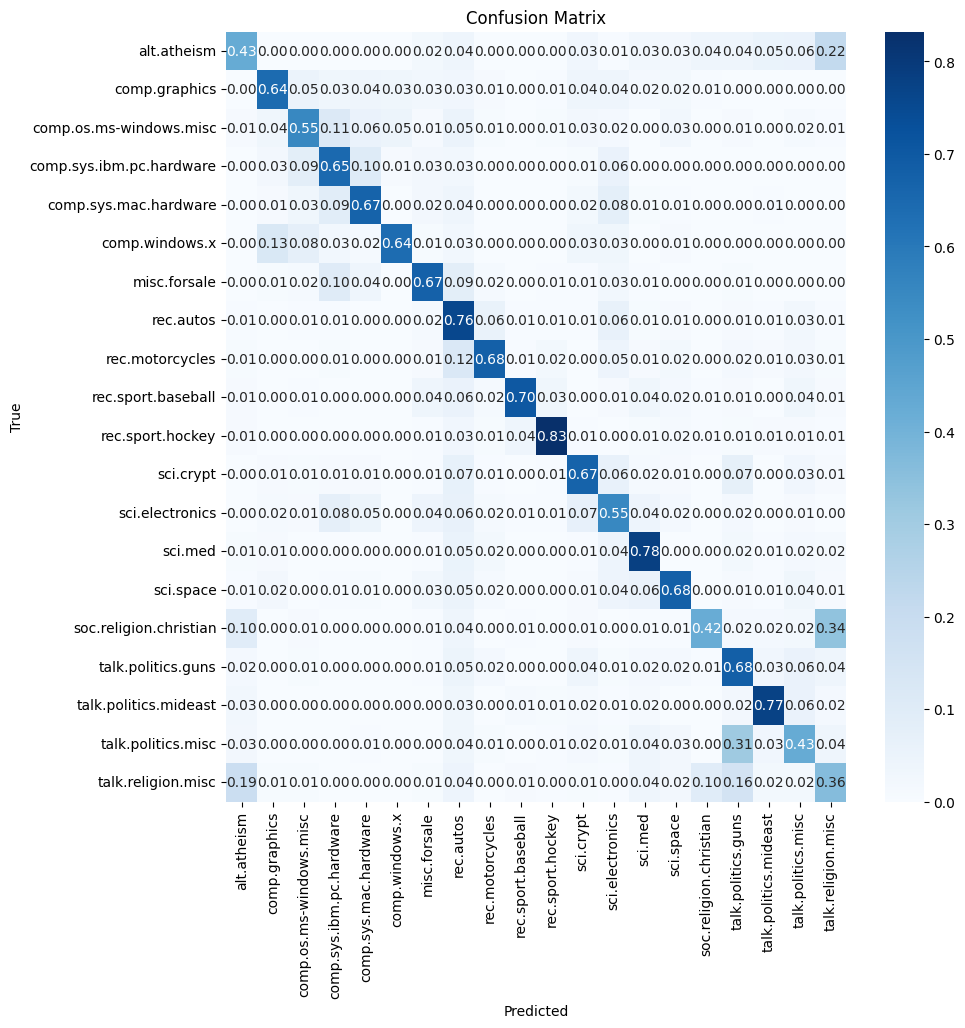

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Get class names from the 'newsgroups_test' dataset
class_names = newsgroups_test.target_names

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[136   1   1   0   0   1   7  13   0   0   1  10   2   9   8  13  13  17
   18  69]
 [  1 250  20  13  15  13  11  12   4   0   2  16  15   7   8   2   0   0
    0   0]
 [  4  14 217  45  23  18   4  20   3   1   3  10   7   1  11   1   4   0
    6   2]
 [  0  10  34 254  41   5  10  11   0   1   0   3  22   0   0   0   0   0
    1   0]
 [  1   5  13  36 257   0   9  16   1   0   0   8  31   3   2   0   1   2
    0   0]
 [  0  50  30  11   6 252   3  11   0   0   1  13  13   0   4   0   0   0
    1   0]
 [  0   3   6  40  14   0 263  34   6   1   2   2  11   2   1   0   3   0
    1   1]
 [  2   1   2   2   0   1   6 300  24   2   2   2  25   3   4   0   5   2
   11   2]
 [  3   1   1   3   1   0   5  48 270   2   8   1  18   5   8   0   7   4
   10   3]
 [  4   1   2   1   0   0  15  23   6 279  13   1   4  14   7   2   5   1
   14   5]
 [  5   0   1   0   0   0   2  12   3  16 332   2   0   3   6   2   3   5
    5   2]
 [  1   5   3   4   4   0   2  26   2   1   2 2

## 5.7 CNN with GloVe 840B (300 dimensions)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train_tok_pad, y_train, test_size=0.1, random_state=42)



### 5.7.1 Model building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

# Creating the embedding matrix
glove_file_path = '/content/drive/MyDrive/ML CW2/Code/Word Embeddings/glove.840B.300d.txt'

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            try:
                vector = np.asarray(values[1:], dtype='float32')
                embeddings[word] = vector
            except ValueError:
                # Skip the line if the conversion fails
                continue
    return embeddings

glove_embeddings = load_glove_embeddings(glove_file_path)

max_words = 20000  # or another value you prefer


embedding_dim = 300  # GloVe embeddings have 300 dimensions
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in intermediate_pipeline_tokenizer_padder.named_steps['tokenizer_padder'].tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


# Model configuration
max_words = 20000  # Number of words in the vocabulary
embedding_dim = 300  # Dimension of the word embeddings
num_filters = 128  # Number of filters in the convolutional layer
kernel_size = 3  # Size of the filters in the convolutional layer
hidden_dims = 250  # Number of units in the hidden dense layer
num_classes = 20  # Number of output classes

# Define the model architecture
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                    weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))

# Convolutional layer
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

# Hidden dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# Output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(X_train2, y_train2, epochs=40, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on test data
score, accuracy = model.evaluate(X_test_tok_pad, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', accuracy)


Epoch 1/40
319/319 [==============================] - 8s 6ms/step - loss: 1.7878 - accuracy: 0.4419 - val_loss: 1.2062 - val_accuracy: 0.6246
Epoch 2/40
319/319 [==============================] - 1s 4ms/step - loss: 1.0474 - accuracy: 0.6697 - val_loss: 1.0599 - val_accuracy: 0.6740
Epoch 3/40
319/319 [==============================] - 1s 4ms/step - loss: 0.8568 - accuracy: 0.7302 - val_loss: 1.0399 - val_accuracy: 0.6855
Epoch 4/40
319/319 [==============================] - 1s 4ms/step - loss: 0.7192 - accuracy: 0.7732 - val_loss: 1.0512 - val_accuracy: 0.6705
Epoch 5/40
319/319 [==============================] - 1s 4ms/step - loss: 0.6000 - accuracy: 0.8051 - val_loss: 1.0695 - val_accuracy: 0.6784
Epoch 6/40
236/236 [==============================] - 1s 3ms/step - loss: 1.2244 - accuracy: 0.6609
Test score: 1.2244166135787964
Test accuracy: 0.6609134078025818


### 5.7.2 Model evaluation

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X_test_tok_pad)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=newsgroups_test.target_names))


236/236 [==============================] - 1s 2ms/step
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.51      0.49       319
           comp.graphics       0.58      0.73      0.65       389
 comp.os.ms-windows.misc       0.62      0.55      0.58       394
comp.sys.ibm.pc.hardware       0.64      0.56      0.60       392
   comp.sys.mac.hardware       0.71      0.57      0.63       385
          comp.windows.x       0.73      0.78      0.76       395
            misc.forsale       0.75      0.72      0.74       390
               rec.autos       0.47      0.77      0.59       396
         rec.motorcycles       0.76      0.68      0.72       398
      rec.sport.baseball       0.81      0.82      0.81       397
        rec.sport.hockey       0.87      0.83      0.85       399
               sci.crypt       0.74      0.70      0.72       396
         sci.electronics       0.70      0.48      0.57       393
                 sci

### 5.7.3 Hyperparameter optimization

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(num_filters=128, kernel_size=3, hidden_dims=250):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                        weights=[embedding_matrix], trainable=False))
    model.add(Dropout(0.2))
    model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(hidden_dims))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(units=20, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

param_grid = {
    'num_filters': [64, 128, 256],
    'kernel_size': [3, 5, 7],
    'hidden_dims': [128, 250, 512],
    'batch_size': [16, 32, 64]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_tok_pad, y_train)  # Use preprocessed training data here

print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-69-74754925ef3b>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Best score: 0.706029 using {'batch_size': 64, 'hidden_dims': 128, 'kernel_size': 3, 'num_filters': 256}


### 5.7.4 Optimized model evaluation

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer

# Preprocess your text data and convert it into embedding vectors



# Model configuration
max_words = 20000  # Number of words in the vocabulary
embedding_dim = 300  # Dimension of the word embeddings
num_filters = 256  # Number of filters in the convolutional layer
kernel_size = 3  # Size of the filters in the convolutional layer
hidden_dims = 128  # Number of units in the hidden dense layer
num_classes = 20  # Number of output classes

# Define the model architecture
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length,
                    weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))

# Convolutional layer
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

# Hidden dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# Output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(X_train2, y_train2, epochs=40, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on test data
score, accuracy = model.evaluate(X_test_tok_pad, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', accuracy)



Epoch 1/40
160/160 [==============================] - 2s 6ms/step - loss: 1.9318 - accuracy: 0.4151 - val_loss: 1.2484 - val_accuracy: 0.6219
Epoch 2/40
160/160 [==============================] - 1s 5ms/step - loss: 1.1437 - accuracy: 0.6358 - val_loss: 1.0909 - val_accuracy: 0.6608
Epoch 3/40
160/160 [==============================] - 1s 5ms/step - loss: 0.9292 - accuracy: 0.7081 - val_loss: 0.9766 - val_accuracy: 0.7041
Epoch 4/40
160/160 [==============================] - 1s 5ms/step - loss: 0.7737 - accuracy: 0.7546 - val_loss: 0.9699 - val_accuracy: 0.6926
Epoch 5/40
160/160 [==============================] - 1s 5ms/step - loss: 0.6570 - accuracy: 0.7970 - val_loss: 0.9630 - val_accuracy: 0.7094
Epoch 6/40
160/160 [==============================] - 1s 5ms/step - loss: 0.5516 - accuracy: 0.8287 - val_loss: 0.9802 - val_accuracy: 0.7023
Epoch 7/40
160/160 [==============================] - 1s 5ms/step - loss: 0.4577 - accuracy: 0.8619 - val_loss: 0.9636 - val_accuracy: 0.7155
Epoch 

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X_test_tok_pad)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=newsgroups_test.target_names))


236/236 [==============================] - 0s 2ms/step
                          precision    recall  f1-score   support

             alt.atheism       0.60      0.43      0.50       319
           comp.graphics       0.61      0.70      0.66       389
 comp.os.ms-windows.misc       0.66      0.59      0.62       394
comp.sys.ibm.pc.hardware       0.64      0.63      0.63       392
   comp.sys.mac.hardware       0.71      0.64      0.67       385
          comp.windows.x       0.82      0.75      0.79       395
            misc.forsale       0.73      0.72      0.72       390
               rec.autos       0.48      0.74      0.58       396
         rec.motorcycles       0.75      0.67      0.71       398
      rec.sport.baseball       0.72      0.85      0.78       397
        rec.sport.hockey       0.85      0.81      0.83       399
               sci.crypt       0.76      0.70      0.73       396
         sci.electronics       0.58      0.60      0.59       393
                 sci

#### Confusion matrix

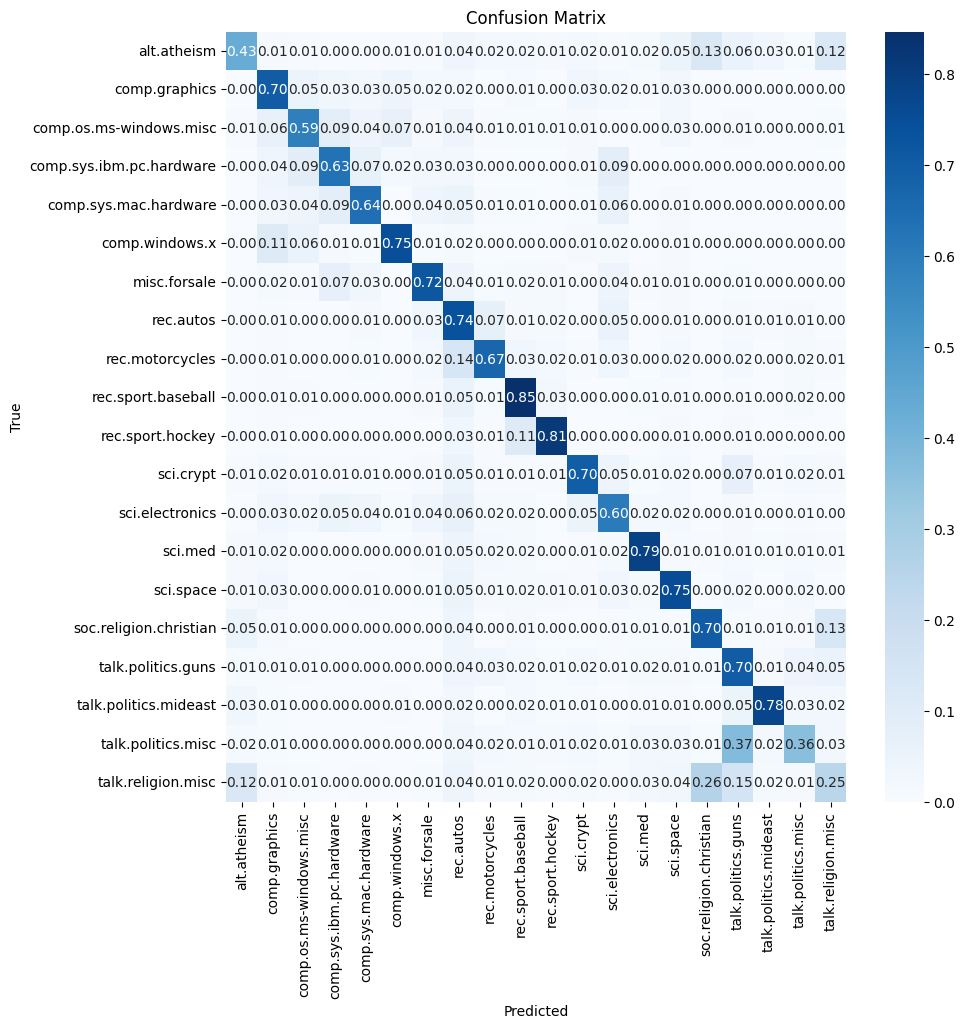

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Get class names from the 'newsgroups_test' dataset
class_names = newsgroups_test.target_names

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[138   4   2   1   0   2   2  12   7   7   4   7   2   5  16  40  18  10
    3  39]
 [  0 273  19  13  10  18   8   9   1   4   1  12   9   2  10   0   0   0
    0   0]
 [  2  25 232  35  17  26   5  17   2   3   3   5   1   1  10   0   5   1
    1   3]
 [  0  16  35 247  27   7  11  11   0   0   0   4  34   0   0   0   0   0
    0   0]
 [  1  12  17  33 246   1  16  19   2   3   0   3  24   1   4   0   1   1
    1   0]
 [  1  42  22   5   3 296   3   6   0   0   1   5   6   0   4   0   0   1
    0   0]
 [  0   6   2  28  13   1 280  17   3   6   5   1  17   2   4   1   3   0
    1   0]
 [  1   2   1   1   5   0  13 293  29   4   6   1  21   1   5   0   5   2
    5   1]
 [  0   2   0   0   3   0   9  54 266  13   8   2  13   1   9   1   8   1
    6   2]
 [  0   2   2   0   0   0   5  21   3 336  11   0   1   3   2   1   2   1
    6   1]
 [  1   2   1   0   0   1   1  12   2  43 324   1   1   0   4   0   5   0
    1   0]
 [  2   9   2   2   2   1   4  20   2   2   2 2

## 5.8 Fine-tuning BERT for Text Classification

### 5.8.1 Model building

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
import torch

# Load the 20newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))


# Tokenize the data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(X_train_cleaned_preprocessed, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test_cleaned_preprocessed, truncation=True, padding=True, max_length=512)

# Create a PyTorch dataset
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsGroupsDataset(train_encodings, y_train)
test_dataset = NewsGroupsDataset(test_encodings, y_test)

# Initialize the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(newsgroups.target_names))

# Set up training arguments and the Trainer
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,   # batch size per device during training
    per_device_eval_batch_size=8,    # batch size for evaluation
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,
    evaluation_strategy="epoch"
)

trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset            # evaluation dataset
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch,Training Loss,Validation Loss
1,1.006100,1.127422
2,0.718400,1.115916
3,0.409800,1.196515


Evaluation results: {'eval_loss': 1.1965150833129883, 'eval_runtime': 71.4015, 'eval_samples_per_second': 105.488, 'eval_steps_per_second': 13.193, 'epoch': 3.0}


### 5.8.2 Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Convert logits to class labels
predicted_labels = predictions.predictions.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7041954328199681


#### Classification report

In [ ]:
from sklearn.metrics import classification_report

# Compute and display the classification report
report = classification_report(y_test, predicted_labels, target_names=newsgroups_test.target_names)
print(report)

                          precision    recall  f1-score   support

             alt.atheism       0.51      0.45      0.48       319
           comp.graphics       0.64      0.76      0.70       389
 comp.os.ms-windows.misc       0.71      0.63      0.67       394
comp.sys.ibm.pc.hardware       0.65      0.67      0.66       392
   comp.sys.mac.hardware       0.72      0.71      0.72       385
          comp.windows.x       0.88      0.73      0.80       395
            misc.forsale       0.81      0.79      0.80       390
               rec.autos       0.51      0.76      0.61       396
         rec.motorcycles       0.75      0.75      0.75       398
      rec.sport.baseball       0.86      0.82      0.84       397
        rec.sport.hockey       0.93      0.88      0.90       399
               sci.crypt       0.81      0.73      0.77       396
         sci.electronics       0.63      0.62      0.62       393
                 sci.med       0.84      0.82      0.83       396
         

### 5.8.3 Hyperparameter optimization

In [ ]:
import optuna
from transformers import Trainer, TrainingArguments
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
import torch

# Load the 20newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))


# Tokenize the data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(X_train_cleaned_preprocessed, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test_cleaned_preprocessed, truncation=True, padding=True, max_length=512)

# Create a PyTorch dataset
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsGroupsDataset(train_encodings, y_train)
test_dataset = NewsGroupsDataset(test_encodings, y_test)

# Initialize the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(newsgroups.target_names))


def objective(trial):
    # Define hyperparameters for this trial
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True)
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 5)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16])

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=per_device_train_batch_size,
        per_device_eval_batch_size=8,
        logging_dir='./logs',
        logging_steps=100,
        evaluation_strategy="epoch",
        learning_rate=learning_rate,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
    )

    # Train the model and get evaluation metrics
    trainer.train()
    eval_results = trainer.evaluate()

    # Return the metric you want to optimize
    return eval_results["eval_loss"]

# Create the Optuna study and optimize the hyperparameters
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)  # Number of trials to perform

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch,Training Loss,Validation Loss
1,2.395300,2.345155
2,2.146000,2.136539


[I 2023-04-23 15:31:29,144] Trial 0 finished with value: 2.1365392208099365 and parameters: {'learning_rate': 1.6308746137682826e-06, 'num_train_epochs': 2, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 2.1365392208099365.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.899500,1.873179
2,1.763800,1.729567
3,1.661900,1.657095
4,1.631600,1.634055


[I 2023-04-23 15:53:53,504] Trial 1 finished with value: 1.6340551376342773 and parameters: {'learning_rate': 1.2033310132183104e-06, 'num_train_epochs': 4, 'per_device_train_batch_size': 16}. Best is trial 1 with value: 1.6340551376342773.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.388700,1.447220
2,1.334100,1.398896


[I 2023-04-23 16:07:57,055] Trial 2 finished with value: 1.3988957405090332 and parameters: {'learning_rate': 1.0283209993204559e-06, 'num_train_epochs': 2, 'per_device_train_batch_size': 4}. Best is trial 2 with value: 1.3988957405090332.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.013900,1.149998
2,0.840200,1.108903


[I 2023-04-23 16:20:30,494] Trial 3 finished with value: 1.1089028120040894 and parameters: {'learning_rate': 7.251415385017702e-06, 'num_train_epochs': 2, 'per_device_train_batch_size': 8}. Best is trial 3 with value: 1.1089028120040894.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.696900,1.107122


[I 2023-04-23 16:27:15,651] Trial 4 finished with value: 1.1071218252182007 and parameters: {'learning_rate': 1.264927220020255e-06, 'num_train_epochs': 1, 'per_device_train_batch_size': 8}. Best is trial 4 with value: 1.1071218252182007.


Best hyperparameters: {'learning_rate': 1.264927220020255e-06, 'num_train_epochs': 1, 'per_device_train_batch_size': 8}


### 5.8.4 Optimized model evaluation

In [ ]:
best_params = study.best_params

best_training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=best_params["num_train_epochs"],
    per_device_train_batch_size=best_params["per_device_train_batch_size"],
    per_device_eval_batch_size=8,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy="epoch",
    learning_rate=best_params["learning_rate"],
)

best_trainer = Trainer(
    model=model,
    args=best_training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model with the best hyperparameters
best_trainer.train()

# Get predictions on the test dataset
predictions = best_trainer.predict(test_dataset)

# Convert logits to class labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Generate and print the classification report
report = classification_report(y_test, predicted_labels, target_names=newsgroups.target_names)
print("Classification Report:\n", report)


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.679000,1.110845


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.43      0.45      0.44       319
           comp.graphics       0.68      0.65      0.66       389
 comp.os.ms-windows.misc       0.60      0.65      0.62       394
comp.sys.ibm.pc.hardware       0.59      0.59      0.59       392
   comp.sys.mac.hardware       0.70      0.61      0.65       385
          comp.windows.x       0.82      0.75      0.78       395
            misc.forsale       0.76      0.76      0.76       390
               rec.autos       0.76      0.73      0.74       396
         rec.motorcycles       0.72      0.67      0.70       398
      rec.sport.baseball       0.56      0.84      0.68       397
        rec.sport.hockey       0.87      0.88      0.87       399
               sci.crypt       0.77      0.68      0.72       396
         sci.electronics       0.57      0.59      0.58       393
                 sci.med       0.81      0.83      

#### Classification report

In [ ]:
from sklearn.metrics import classification_report

# Compute and display the classification report
report = classification_report(y_test, predicted_labels, target_names=newsgroups_test.target_names)
print(report)

                          precision    recall  f1-score   support

             alt.atheism       0.43      0.45      0.44       319
           comp.graphics       0.68      0.65      0.66       389
 comp.os.ms-windows.misc       0.60      0.65      0.62       394
comp.sys.ibm.pc.hardware       0.59      0.59      0.59       392
   comp.sys.mac.hardware       0.70      0.61      0.65       385
          comp.windows.x       0.82      0.75      0.78       395
            misc.forsale       0.76      0.76      0.76       390
               rec.autos       0.76      0.73      0.74       396
         rec.motorcycles       0.72      0.67      0.70       398
      rec.sport.baseball       0.56      0.84      0.68       397
        rec.sport.hockey       0.87      0.88      0.87       399
               sci.crypt       0.77      0.68      0.72       396
         sci.electronics       0.57      0.59      0.58       393
                 sci.med       0.81      0.83      0.82       396
         

#### Confusion matrix

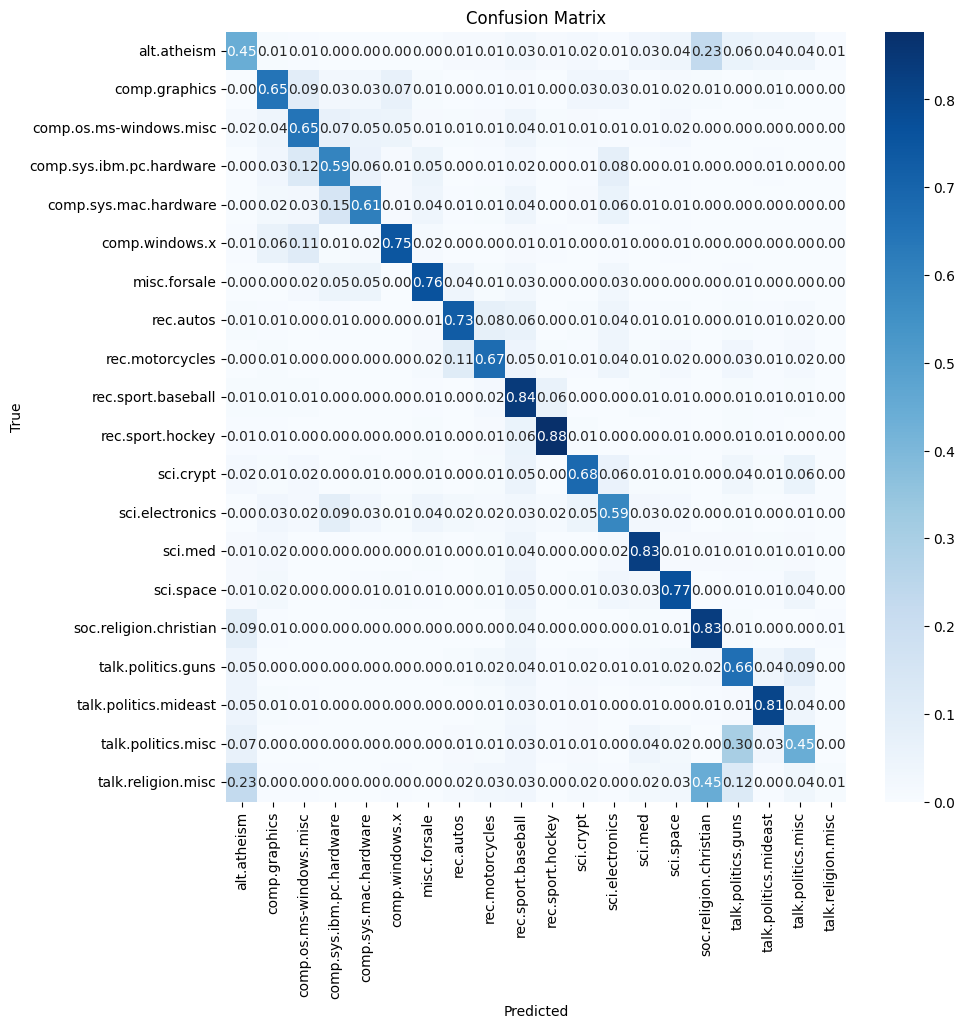

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Get class names from the 'newsgroups_test' dataset
class_names = newsgroups_test.target_names

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[142   3   2   0   0   0   1   4   4   9   4   6   2  10  13  73  18  13
   13   2]
 [  1 251  36  10  11  26   3   1   2   5   1  13  13   2   6   3   1   3
    0   1]
 [  6  17 255  26  21  19   5   3   5  15   3   5   2   2   7   0   1   1
    1   0]
 [  1  13  49 233  24   5  19   1   2   7   0   2  32   0   2   0   0   2
    0   0]
 [  1   9  10  57 236   4  17   2   3  15   0   4  22   2   2   0   0   0
    1   0]
 [  2  25  43   4   6 296   6   1   0   5   2   0   2   0   2   0   0   0
    1   0]
 [  0   0   7  19  19   0 297  15   4  12   0   1  11   1   1   1   2   0
    0   0]
 [  3   2   0   2   0   1   5 289  31  25   1   3  17   2   3   0   4   2
    6   0]
 [  1   3   1   1   0   1   6  42 268  19   4   2  17   3   7   1  13   2
    7   0]
 [  4   4   3   0   0   0   2   1   7 334  25   1   1   3   2   0   4   2
    4   0]
 [  2   2   0   0   0   0   4   1   5  22 350   4   1   1   2   0   3   2
    0   0]
 [  7   4   8   1   4   1   3   0   4  21   0 2